<a href="https://colab.research.google.com/github/dudushi/CLA23-24/blob/main/HM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| Student          | ID | mail |
| :---------------- | :------: | ----: |
| Kevin Elezi        |  s316685   | kevin.elezi@studenti.polito.it|
| Suyash Singh          |   s307798   | suyash.singh@studenti.polito.it |

# $\text{Homework1 : PCA}$

In [ ]:
# Remove when printing the PDF.
#%matplotlib widget

import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display

pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

## 0. Preparation (Setting the Random State)

In [ ]:
kevin_id = 316685
suyash_id = 307798

rs = min(kevin_id, suyash_id)

In [ ]:
np.random.seed(rs)
array = np.random.rand(2,3)
array

array([[0.0126772 , 0.07770922, 0.80987727],
       [0.07571138, 0.37595698, 0.63759749]])

## 1. Exercise 1 (Loading and Preparing the Data)

### 1.1. Store in the variable **df_tot** the df obtained from the csv file.

In [ ]:
dataset_path = '/content/drive/MyDrive/1_HMs_comptuational/HM1/cla4lsp customers.csv'

df_tot = pd.read_csv(dataset_path, sep = '\t')
df_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Transform the Dt_Customer in Datatype64

df_tot.loc[df_tot.index, 'Dt_Customer'] = pd.to_datetime(df_tot['Dt_Customer'], format='%d-%m-%Y')

<ipython-input-5-75df357e0c2b>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_tot.loc[df_tot.index, 'Dt_Customer'] = pd.to_datetime(df_tot['Dt_Customer'], format='%d-%m-%Y')


### 1.2. create a sub-DFs **workdf**, extracted from df tot, such that it contains 2/3 of the original dataframe’s rows (randomly sampled);

In [ ]:
l_rows = df_tot.shape[0]
l_selected = (l_rows * 2) // 3

# Sampling randomly the rows indexes :
np.random.seed(rs)
random_row_idx = np.random.choice(range(l_rows), l_selected, replace = False)

workdf = df_tot.iloc[random_row_idx]
workdf

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
385    948        1971  Graduation         Single  10245.0        1         0   
1494  2005        1990  Graduation        Married  35765.0        1         0   
821   1143        1972  Graduation        Married  22063.0        1         0   
1720  6742        1979  Graduation        Married  17688.0        1         0   
1453  5975        1967         PhD         Single  40304.0        1         0   
...    ...         ...         ...            ...      ...      ...       ...   
1976  5117        1963    2n Cycle        Married  32632.0        0         0   
2077   954        1960       Basic          Widow  22123.0        0         0   
669   7426        1971    2n Cycle        Married  54690.0        1         1   
1516  1490        1962  Graduation        Married  55759.0        0         1   
567    891        1951      Master       Together  29298.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
385   2013-05-15       32         4          7                7   
1494  2013-12-11       86        22          3               30   
821   2013-08-08       43         7         10               13   
1720  2013-01-13       82         2          2                1   
1453  2013-09-30       82        37          0               17   
...          ...      ...       ...        ...              ...   
1976  2012-08-02       32        63        151              137   
2077  2014-03-27       77         3          3               24   
669   2013-11-07       76       111         16               37   
1516  2012-11-28       84       675          0               85   
567   2013-09-07       60         6          0                2   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
385                 6                 4            13                  3   
1494                0                 5            15                  2   
821                 3                11            11                  2   
1720                3                 1             2                  1   
1453                0                 0             3                  1   
...               ...               ...           ...                ...   
1976              153                19            53                  2   
2077               34                 7            31                  1   
669                 7                 9            18                  3   
1516               10                 7            77                  5   
567                 2                 0             1                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
385                 1                    2                  2   
1494                2                    0                  4   
821                 2                    0                  3   
1720                1                    0                  2   
1453                2                    0                  3   
...               ...                  ...                ...   
1976                4                    4                  8   
2077                2                    1                  3   
669                 3                    1                  5   
1516               10                    3                  8   
567                 1                    0                  2   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
385                   5             0             0             0   
1494                  6             0             0             0   
821                   7             0             0             0   
1720                  8             0             0             0   
1453                  7             0             0             0   
...                 ...           ...           ...           ...   
1976                  5             0             0  

### 1.3. let us denote (see Appendix A) with:
>• **labels**: the columns NumDealsPurchases, AcceptedCmp1, ..., AcceptedCmp5, Re- sponse, Complain, Recency; <br>
>• **features**: all the other ones, except for ID, Z CostComtact, and Z revenue (i.e., discard these columns).

In [ ]:
label_columns = ['NumDealsPurchases',
                 'AcceptedCmp1',
                 'AcceptedCmp2',
                 'AcceptedCmp3',
                 'AcceptedCmp4',
                 'AcceptedCmp5',
                 'Response',
                 'Complain',
                 'Recency']

exclude_columns = ['ID',
                   'Z_CostContact',
                   'Z_Revenue']

features_columns = ['Year_Birth',
                    'Education',
                    'Marital_Status',
                    'Income',
                    'Kidhome',
                    'Teenhome',
                    'Dt_Customer',
                    'MntWines',
                    'MntFruits',
                    'MntMeatProducts',
                    'MntFishProducts',
                    'MntSweetProducts',
                    'MntGoldProds',
                    'NumWebPurchases',
                    'NumCatalogPurchases',
                    'NumStorePurchases',
                    'NumWebVisitsMonth']


workdf = workdf.drop(exclude_columns, axis = 1)
#features = workdf[features_columns]
#labels = workdf[label_columns]

### 1.4. Remove randomly from workdf one feature column among the spending habits or the purchasing habits ; <br>
i.e., remove one column among this list:
> _MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumWebPur- chases, NumCatalogPurchases, NumStorePurchases_.

In [ ]:
removable_columns = ['MntWines',
                     'MntFruits',
                     'MntMeatProducts',
                     'MntFishProducts',
                     'MntSweetProducts',
                     'MntGoldProds',
                     'NumWebPurchases',
                     'NumCatalogPurchases',
                     'NumStorePurchases']

np.random.seed(rs)
column_to_drop = np.random.choice(removable_columns)
workdf = workdf.drop(column_to_drop, axis = 1)

Just let keep updated the list of features_columns :

In [ ]:
features_columns.remove(column_to_drop)

### 1.5. Clean the dataset workdf from missing values in the feature columns _(if needed)_.

In [ ]:
categorical_cols = workdf.select_dtypes(include = object)
numerical_cols = workdf.select_dtypes(exclude='object')

categorical_missing = categorical_cols.isna().sum()
numerical_missing = numerical_cols.isna().sum()

print('The missing values for the categorical features are :')
print(categorical_missing)
print()
print('The missing values for the numerical features are :')
print(numerical_missing)

The missing values for the categorical features are :
Education         0
Marital_Status    0
dtype: int64

The missing values for the numerical features are :
Year_Birth              0
Income                 20
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64


The only missing value are present in the Income feature, and this is just for 20 samples. <br>
In order to avoiding the dirty of the dataset, we decided to remove those 20 samples instead of trying to figure them out.  <br> We prefere fewer samples than more samples but misleading.

In [ ]:
workdf = workdf.dropna()

In [ ]:
features = workdf[features_columns]
labels = workdf[label_columns]

workdf = pd.concat([labels,features],axis=1)

# Now we have an ordered Dataframe with a structure like :
# dataset = [labels|features]

In [ ]:
workdf

NumDealsPurchases  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
385                   3             0             0             0   
1494                  2             0             0             0   
821                   2             0             0             0   
1720                  1             0             0             0   
1453                  1             0             0             0   
...                 ...           ...           ...           ...   
1976                  2             0             0             0   
2077                  1             0             0             0   
669                   3             0             0             0   
1516                  5             0             0             0   
567                   1             0             0             0   

      AcceptedCmp4  AcceptedCmp5  Response  Complain  Recency  Year_Birth  \
385              0             0         0         0       32        1971   
1494             0             0         0         0       86        1990   
821              0             0         0         0       43        1972   
1720             0             0         0         1       82        1979   
1453             0             0         0         0       82        1967   
...            ...           ...       ...       ...      ...         ...   
1976             0             0         0         0       32        1963   
2077             0             0         0         0       77        1960   
669              0             0         0         0       76        1971   
1516             0             0         0         0       84        1962   
567              0             0         0         0       60        1951   

       Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
385   Graduation         Single  10245.0        1         0  2013-05-15   
1494  Graduation        Married  35765.0        1         0  2013-12-11   
821   Graduation        Married  22063.0        1         0  2013-08-08   
1720  Graduation        Married  17688.0        1         0  2013-01-13   
1453         PhD         Single  40304.0        1         0  2013-09-30   
...          ...            ...      ...      ...       ...         ...   
1976    2n Cycle        Married  32632.0        0         0  2012-08-02   
2077       Basic          Widow  22123.0        0         0  2014-03-27   
669     2n Cycle        Married  54690.0        1         1  2013-11-07   
1516  Graduation        Married  55759.0        0         1  2012-11-28   
567       Master       Together  29298.0        1         1  2013-09-07   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntGoldProds  \
385          4          7                7                6            13   
1494        22          3               30                0            15   
821          7         10               13                3            11   
1720         2          2                1                3             2   
1453        37          0               17                0             3   
...        ...        ...              ...              ...           ...   
1976        63        151              137              153            53   
2077         3          3               24               34            31   
669        111         16               37                7            18   
1516       675          0               85               10            77   
567          6          0                2                2             1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
385                 1                    2                  2   
1494                2                    0                  4   
821                 2                    0                  3   
1720                1                    0                  2   
1453                2                    0                  3   
...               ...               

## 2. Exercise 2 (Encoding of Categorical Data):

### Analyze and prepare workdf for the PCA. In particular, apply a proper encoding of the categorical features. Once applied the encoding, store into a variable Xworkdf the sub-DF obtained from workdf selecting the feature columns (updated to the new encoding).

In [ ]:
categorical_cols = workdf.select_dtypes(include = object)
categorical_cols

Education Marital_Status
385   Graduation         Single
1494  Graduation        Married
821   Graduation        Married
1720  Graduation        Married
1453         PhD         Single
...          ...            ...
1976    2n Cycle        Married
2077       Basic          Widow
669     2n Cycle        Married
1516  Graduation        Married
567       Master       Together

[1473 rows x 2 columns]

We have just two features to encode : let's see the unique values in order to imagine how we can manage these categorical data

In [ ]:
education_unique = workdf['Education'].unique()
mstatus_unique = workdf['Marital_Status'].unique()

education_unique, mstatus_unique

(array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object),
 array(['Single', 'Married', 'Divorced', 'Together', 'Widow', 'YOLO',
        'Absurd', 'Alone'], dtype=object))

By the moment that we have just two features to encode, and, for each features, just some fews values we decided to opt for two possible encoding : <br>
*  The One-Hot Encoding
*  The Ordinal Encoding  <br>

The first one is certainly the easiest and common one. The problem is that it will increase by <br>
> len(education_unique) + len(mstatus_unique) = _13_ <br>

the number of columns. <br>
We would like to avoid this, and the Ordinal Encoding is what could help us. <br>



###**ORDINAL ENCODING**

In order to assign values to the categorical ones, wee need to find an ordinal meaning to each of one. <br>
We thought that given the two features, we could assign a higher number for states (economic and marriage) that socially speaking provide greater economic stability/wealth.
For example the Possible Wealth Scale could be : <br>
<br>

-  Education :<br>
{ 'Basic' = 0, 'Graduation' = 1 , '2n Cycle' = 2, 'PhD' = 3, 'Master' = 4  }

-  Marital_Status : <br>
{ 'Alone' = 0, 'Single' = 1, 'Together' = 2, 'Married' = 3, 'Divorced' = 4, 'Widow' = 5, 'YOLO' = 6,'Absurd' = 7 }

<br>
<br>

Despite this sub-classification, we need to provid in out dataset that this is working. We could do that by veryfing the correlation between these two features and the income :

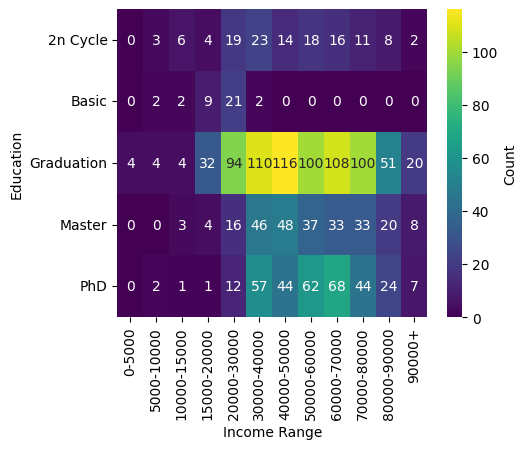

In [ ]:
# @title
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming workdf is your DataFrame
plt.subplots(figsize=(5, 4))

# Define income ranges up to 70000
income_bins = [0, 5000, 10000, 15000, 20000, 30000, 40000, 50000, 60000, 70000, 80000 , 90000 , float('inf')]
income_labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-30000', '30000-40000', '40000-50000', '50000-60000', '60000-70000', '70000-80000' , '80000-90000','90000+']

df_2dhist = pd.DataFrame()

# Create income range column
df_2dhist['Income_Range'] = pd.cut(workdf['Income'], bins=income_bins, labels=income_labels, right=False)
df_2dhist['Education'] = workdf['Education']

# Create a pivot table for counts
df_2dhist_pivot = df_2dhist.pivot_table(index='Education', columns='Income_Range', aggfunc='size', fill_value=0)

# Plot the heatmap
sns.heatmap(df_2dhist_pivot, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Count'})

# Set labels
plt.xlabel('Income Range')
plt.ylabel('Education')

# Show the plot
plt.show()


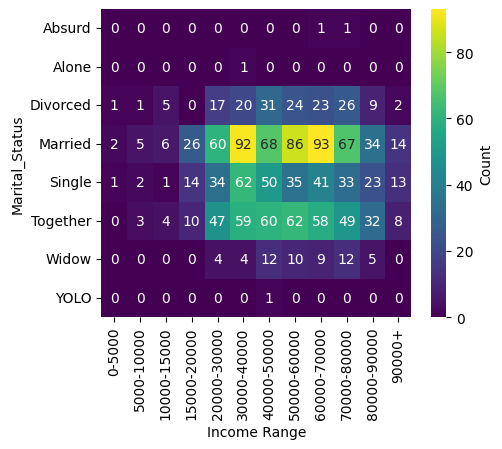

In [ ]:
# @title
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming workdf is your DataFrame
plt.subplots(figsize=(5, 4))

# Define income ranges up to 70000
income_bins = [0, 5000, 10000, 15000, 20000, 30000, 40000, 50000, 60000, 70000, 80000 , 90000 , float('inf')]
income_labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-30000', '30000-40000', '40000-50000', '50000-60000', '60000-70000', '70000-80000' , '80000-90000','90000+']

# Create income range column
df_2dhist['Income_Range'] = pd.cut(workdf['Income'], bins=income_bins, labels=income_labels, right=False)
df_2dhist['Marital_Status'] =  workdf['Marital_Status']

# Create a pivot table for counts
df_2dhist_pivot = df_2dhist.pivot_table(index='Marital_Status', columns='Income_Range', aggfunc='size', fill_value=0)

# Plot the heatmap
sns.heatmap(df_2dhist_pivot, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Count'})

# Set labels
plt.xlabel('Income Range')
plt.ylabel('Marital_Status')

# Show the plot
plt.show()

Unfortunately, as the correlation shows us, somewhat as we expected, the reality is always different from what we expect : <br>
The categories in between such as 'Married' and 'Graduation' (averages over the 'possible wealth' scale set earlier) have the highest 'Incomes'. <br>
This fact shows us that using **Ordinal Ecoding on these categories does not make practical sense** and would lead to our future PCA misinterpreting the data. What we will therefore do is to use One-Hot Encoding and take on the additional 19 columns. <br> <br>

###**ONE-HOT ENCODING**

In [ ]:
Xworkdf = pd.get_dummies(workdf).iloc[:,9:]
for cols in Xworkdf.columns:
  print(f'max of {cols} ꞉ {max(Xworkdf[cols])}')

max of Year_Birth ꞉ 1996
max of Income ꞉ 666666.0
max of Kidhome ꞉ 2
max of Teenhome ꞉ 2
max of Dt_Customer ꞉ 2014-06-29 00:00:00
max of MntWines ꞉ 1493
max of MntFruits ꞉ 197
max of MntMeatProducts ꞉ 1725
max of MntFishProducts ꞉ 259
max of MntGoldProds ꞉ 321
max of NumWebPurchases ꞉ 25
max of NumCatalogPurchases ꞉ 28
max of NumStorePurchases ꞉ 13
max of NumWebVisitsMonth ꞉ 20
max of Education_2n Cycle ꞉ 1
max of Education_Basic ꞉ 1
max of Education_Graduation ꞉ 1
max of Education_Master ꞉ 1
max of Education_PhD ꞉ 1
max of Marital_Status_Absurd ꞉ 1
max of Marital_Status_Alone ꞉ 1
max of Marital_Status_Divorced ꞉ 1
max of Marital_Status_Married ꞉ 1
max of Marital_Status_Single ꞉ 1
max of Marital_Status_Together ꞉ 1
max of Marital_Status_Widow ꞉ 1
max of Marital_Status_YOLO ꞉ 1


## 3. Exercise 3 (Preprocessing and full-PCA):

Preprocess the data, before applying the PCA:

### 3.1 Create two DFs *Xworkdf_std* and *Xworksf_mm*, created using a StandardScaler and a MinMaxScaler (min “ 0, max “ 1), respectively, applied to *Xworkdf*.


Before the normalizing of the data, we have to work with the ['Dt_Customer'] column because it is in the format DataType. <br>
This kind of type is not usable by the StandardScaler() and MinMaxScaler(). <br>
We'll make a transformation : <br>

Xworkdf['Dt_Customer'] --> Xworkdf['Days_Customer'] where for an element $i$ of the dataset : <br> <br>

> $Xworkdf[Days Customer]_i$<br> $ = max(Xworkdf[Dt Customer]) - Xworkdf[Dt Customer]_i $

<br> For simplicity : <br>

> $customer(days)_i$$ = max(date) -$ $customer(date)_i$<br>

In [ ]:
max_date = Xworkdf['Dt_Customer'].values.max()
Xworkdf['Days_Customer'] = (max_date - Xworkdf['Dt_Customer']).dt.days
Xworkdf = Xworkdf.drop('Dt_Customer', axis = 1)

In this way the older is the enrollment in the company the bigger will be the new value situated in ['Days_Customer']. <br> The same meaning is now represented in a different data type !

In [ ]:
stdscaler = StandardScaler()
mmscaler = MinMaxScaler(feature_range=(0,1))

Xworkdf_std = stdscaler.fit_transform(Xworkdf.values)
Xworkdf_mm = mmscaler.fit_transform(Xworkdf.values)

Xworkdf_std = pd.DataFrame(Xworkdf_std, columns = Xworkdf.columns)
Xworkdf_mm = pd.DataFrame(Xworkdf_mm, columns = Xworkdf.columns)

### 3.2 Analyze and comment a comparison of the **variances** of *Xworkdf* with the variances of *Xworkdf_std* and *Xworkdf_mm*. What do you observe from this analysis?

Average variances ꞉ [26528659.238743573, 0.07117851487361439, 1.000679347826087]



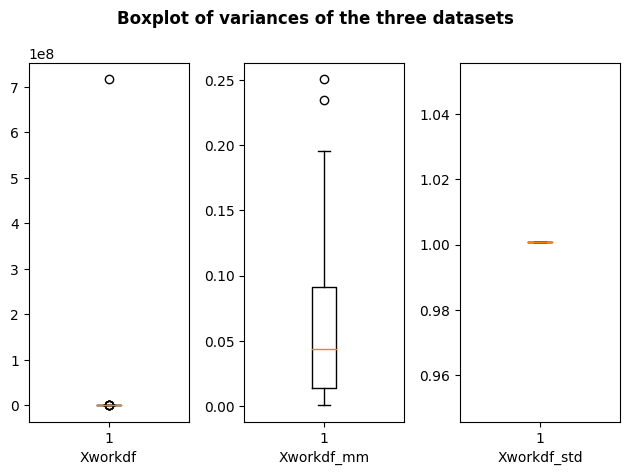

In [ ]:
labels = Xworkdf.columns.tolist()
means = [Xworkdf.var().mean(), Xworkdf_mm.var().mean(), Xworkdf_std.var().mean()]
print("Average variances ꞉ " + str(means))
print('')

fig = plt.figure()
fig.suptitle('Boxplot of variances of the three datasets',fontweight ='bold')

# Let's plot the variance for each feature, for each normalization technique :
plt.subplot(1,3,1)
plt.boxplot(Xworkdf.var())
plt.xticks()
plt.xlabel('Xworkdf')

plt.subplot(1,3,2)
plt.boxplot(Xworkdf_mm.var())
plt.xlabel('Xworkdf_mm')

plt.subplot(1,3,3)
plt.boxplot(Xworkdf_std.var())
plt.xlabel('Xworkdf_std')

plt.tight_layout()
plt.show()

In [ ]:
Xworkdf.var().mean(), Xworkdf_mm.var().mean(), Xworkdf_std.var().mean()

(26528659.238743573, 0.07117851487361439, 1.000679347826087)

When comparing the variances of features in the original dataset, **Xworkdf**, with those in the datasets **Xworkdf_std** (standardized using StandardScaler) and **Xworkdf_mm** (normalized using MinMaxScaler), one observes that the variances in the standardized and normalized datasets are considerably smaller. This reduction in variance is a result of StandardScaler transforming the data to have a mean of 0 and a standard deviation of 1, while MinMaxScaler scales the data between 0 and 1.
<br>
<br>
This analysis leads us to infer that the PCA algorithm may yield improved performance on the standardized or normalized datasets (**Xworkdf_std** and **Xworkdf_mm**) compared to the original dataset (**Xworkdf**). The reason lies in the similarity of variances among features, which enhances the algorithm's ability to identify underlying patterns and trends in the data. Furthermore, standardizing or normalizing the data helps prevent bias in the PCA algorithm towards features with larger variances.

### 3.3 Apply the “full” PCA to the DFs (Xworkdf, Xworkdf std, Xworkdf mm) and plot the curve of the cumulative explained variance. Looking at the results, improve the analysis and comments made at the previous step.

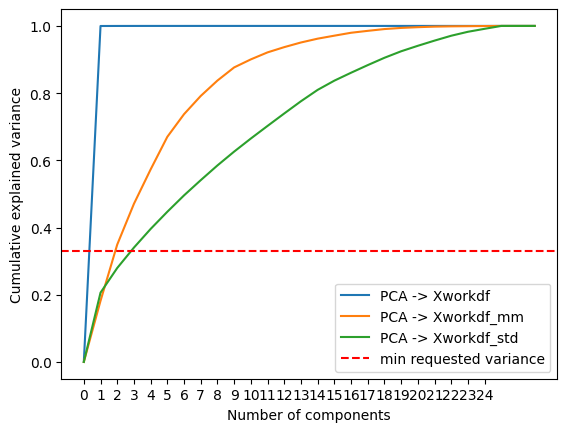

In [ ]:
pca = PCA()
Xworkdf_pca = pca.fit_transform(Xworkdf)

pca_mm = PCA()
Xworkdf_mm_pca = pca_mm.fit_transform(Xworkdf_mm)

pca_std = PCA()
Xworkdf_std_pca = pca_std.fit_transform(Xworkdf_std)

plt.close('all')

#x_values = np.arange(len(pca.explained_variance_ratio_.cumsum()))

# np.insert(array,0,0) needs to insert a 0 in the first value of the cumsum().
# in this way make the plot passing trough the 0.
plt.plot(np.insert(pca.explained_variance_ratio_.cumsum(),0,0),label='PCA -> Xworkdf')
plt.plot(np.insert(pca_mm.explained_variance_ratio_.cumsum(),0,0), label = 'PCA -> Xworkdf_mm')
plt.plot(np.insert(pca_std.explained_variance_ratio_.cumsum(),0,0), label = 'PCA -> Xworkdf_std')
plt.axhline(y=0.33, color='r', linestyle='--', label='min requested variance')

plt.ylabel('Cumulative explained variance')
plt.xlabel('Number of components')
plt.xticks(np.arange(25))
plt.legend()
#plt.xticks(x_values)
plt.show()

The graph provides insight into the amount of information retained by the principal components. <br> <br>
A steeper curve indicates that the initial components capture a significant portion of the dataset's variance. <br> <br>
Specifically, for a given dataset, a steeper curve implies that a smaller number of principal components are needed to preserve substantial information. The point where the curve levels off signifies the number of components required to retain the majority of the dataset's information.
 <br> <br>
Notably, the non-standardized dataset exhibits a steeper curve, primarily attributable to the higher variance observed in certain features. This suggests that the initial principal components in the non-standardized dataset account for a larger share of the overall variance compared to the standardized and normalized counterparts. <br> <br>


In [ ]:
# @title
var_comparison = pd.DataFrame( {
    'Xworkdf.var()': Xworkdf.var(),
    'Xworkdf_mm.var()': Xworkdf_mm.var(),
    'Xworkdf_std.var()': Xworkdf_std.var(),

})
print('Xworkdf')
print('------------------------------------------------------------------')
print('For the non-normalized dataset,')
print('the min-max values of variance are :')
print(f"({var_comparison['Xworkdf.var()'].min()}, {var_comparison['Xworkdf.var()'].max()})")
print('')

print()

print('Xworkdf_mm')
print('------------------------------------------------------------------')
print('For the mm-normalized dataset,')
print('the min-max values of variance are :')
print(f"({var_comparison['Xworkdf_mm.var()'].min()}, {var_comparison['Xworkdf_mm.var()'].max()})")
print('')

print()

print('Xworkdf_std')
print('------------------------------------------------------------------')
print('For the standard-normalized dataset,')
print('the min-max values of variance are :')
print(f"({var_comparison['Xworkdf_std.var()'].min()}, {var_comparison['Xworkdf_std.var()'].max()})")
print('')

Xworkdf
------------------------------------------------------------------
For the non-normalized dataset,
the min-max values of variance are :
(0.000678886625933469, 716056483.2861212)


Xworkdf_mm
------------------------------------------------------------------
For the mm-normalized dataset,
the min-max values of variance are :
(0.000678886625933469, 0.2501503512500369)


Xworkdf_std
------------------------------------------------------------------
For the standard-normalized dataset,
the min-max values of variance are :
(1.0006793478260867, 1.0006793478260876)



The reason we are showing you this data is to give you a better understanding of why Principal Components normalized with the MinMaxScaler() have more information than those normalized with the StandardScaler().
<br><br>
The MinMaxScaler() process limits our data from a minimum of 0 to a maximum of 1, as already explained.
These values, 0 and 1, are the same as our label encoded **categorical features**.  So we have that the variance for those features will be much greater than for all the others since the values can only be represented by the two extremes.

In [ ]:
# @title
print(var_comparison.loc[['Marital_Status_Married' , 'NumWebPurchases']])

                        Xworkdf.var()  Xworkdf_mm.var()  Xworkdf_std.var()
Marital_Status_Married       0.234640          0.234640           1.000679
NumWebPurchases              7.226903          0.011563           1.000679


As you can see for those two features (one categorical and the other non-categorical), the difference in the variance is pretty high: <br>
> 0.2346 vs 0.0115

For this reason, categorical features, when normalized by the MinMaxScaler() give a preponderant weight in the PCA analysis, which could lead to inaccurate results.

## 4. Exercise 4 (Dimensionality Reduction and Interpretation of the PCs):

### 4.0 Apply PCA

Apply the PCA to both _Xworkdf_ std and _Xworkdf mm_, selecting $m$ PCs such that <br>
>$m =  min(m', 5)$ <br>

where $m'$ is the minimum number of Principaln Components (PC) that explains 33% of the total variance. <br> Plot the
barplots of percentage of explained variance, with respect to the PCs.

In [ ]:
variances = pca.explained_variance_ratio_
total_variance = 0
m = 0

while total_variance < 0.33 :
  total_variance += variances[m]
  m += 1

print(f'The minimum number of PCs that kept 33% of the explained variance are: {m}')

The minimum number of PCs that kept 33% of the explained variance are: 1


As we could have expected, the first PC for the non-normalized dataframe retain most of the variance.

In [ ]:
variances = pca_mm.explained_variance_ratio_
total_variance = 0
m_mm = 0

while total_variance < 0.33 :
  total_variance += variances[m_mm]
  m_mm += 1

print(f'The minimum number of PCs that kept 33% of the explained variance are: {m_mm}')

The minimum number of PCs that kept 33% of the explained variance are: 2


In [ ]:
variances = pca_std.explained_variance_ratio_
total_variance = 0
m_std = 0

while total_variance < 0.33 :
  total_variance += variances[m_std]
  m_std += 1

print(f'The minimum number of PCs that kept 33% of the explained variance are: {m_std}')

The minimum number of PCs that kept 33% of the explained variance are: 3




Now let's plot the percentage of explained variance, with respect to the PCs:

In [ ]:
# Applying the PCA for the std normalized data :
pca_std = PCA(n_components = min(m_std,5), random_state= rs )
Xworkdf_std_pca = pca_std.fit_transform(Xworkdf_std)

# Applying the PCA for the mm normalized data :
pca_mm = PCA(n_components = min(m_mm,5), random_state= rs)
Xworkdf_mm_pca = pca_mm.fit_transform(Xworkdf_mm)

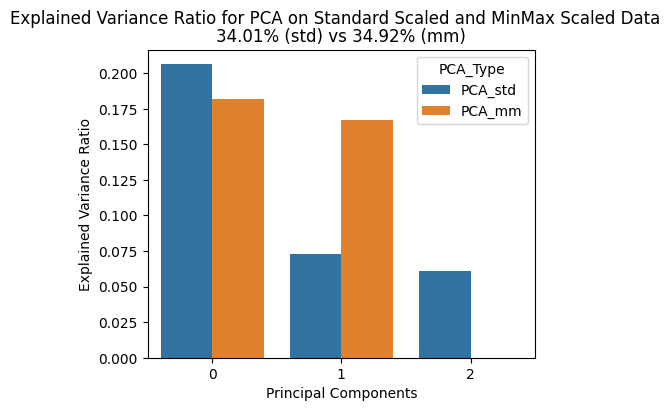

In [ ]:
import seaborn as sns

plt.close('all')

# Fixing the missing PC of the mm normalization in order to plot them together.
pca_mm_plot = np.insert(pca_mm.explained_variance_ratio_, 2, 0)

bar = pd.DataFrame({
    'PCA_std': pca_std.explained_variance_ratio_,
    'PCA_mm': pca_mm_plot,
    'n_PC': [0, 1, 2]
})

# Melt the DataFrame for easier plotting with seaborn
bar_melted = pd.melt(bar, id_vars='n_PC', var_name='PCA_Type', value_name='Explained_Variance_Ratio')

round_expl_var_ratio_std = np.round(pca_std.explained_variance_ratio_.sum() * 100, 2)  # <-- TODO!!
round_expl_var_ratio_mm = np.round(pca_mm.explained_variance_ratio_.sum() * 100, 2)

# Create a grouped bar plot using seaborn
plt.figure(figsize=(5, 4))
sns.barplot(x='n_PC', y='Explained_Variance_Ratio', hue='PCA_Type', data=bar_melted)
plt.suptitle('Explained Variance Ratio for PCA on Standard Scaled and MinMax Scaled Data')
plt.title(f'{round_expl_var_ratio_std}% (std) vs {round_expl_var_ratio_mm }% (mm)')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

*   The *mm standardization* keeps more informations in less components, and both of them, are almost in the same 'explanation level'. <br>
*   The *std standardization* instead, has the first PC in a predominant scenario w.r.t. the other two. <br> <br>

Let's see now how these PCs could be interpreted.

### 4.1 • Given the PCs of _Xworkdf std_ and _Xworkdf mm_, give them an interpretation and, therefore, a name. Tables and/or plots are welcome;

In [ ]:
# @title
pc1 =r'''
   ___  ___   _
  / _ \/ __\ / |
 / /_)/ /    | |
/ ___/ /___  | |
\/   \____/  |_|
'''

pc2 = r'''
   ___  ___   ____
  / _ \/ __\ |___ \
 / /_)/ /      __) |
/ ___/ /___   / __/
\/   \____/  |_____|
'''

pc3 = r'''
   ___  ___   _____
  / _ \/ __\ |___ /
 / /_)/ /      |_ \
/ ___/ /___   ___) |
\/   \____/  |____/
'''

### ▶ 4.1.1 **Xworkdf_std** --> n_components = 3

In [ ]:
pca_std = PCA(n_components = min(m_std,5) , random_state= rs)
Xworkdf_std_pca = pca_std.fit_transform(Xworkdf_std)

In [ ]:
print(f'The number of input features before the PCA is : {pca_std.n_features_in_}')
print(f'Principal axes in feature space, representing the directions of maximum variance in the data.shape : {pca_std.components_.shape}')
print(f'Data after PCA.shape : {Xworkdf_std_pca.shape}'),
print(f'Data before PCA.shape : {Xworkdf_std.shape}')

The number of input features before the PCA is : 27
Principal axes in feature space, representing the directions of maximum variance in the data.shape : (3, 27)
Data after PCA.shape : (1473, 3)
Data before PCA.shape : (1473, 27)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


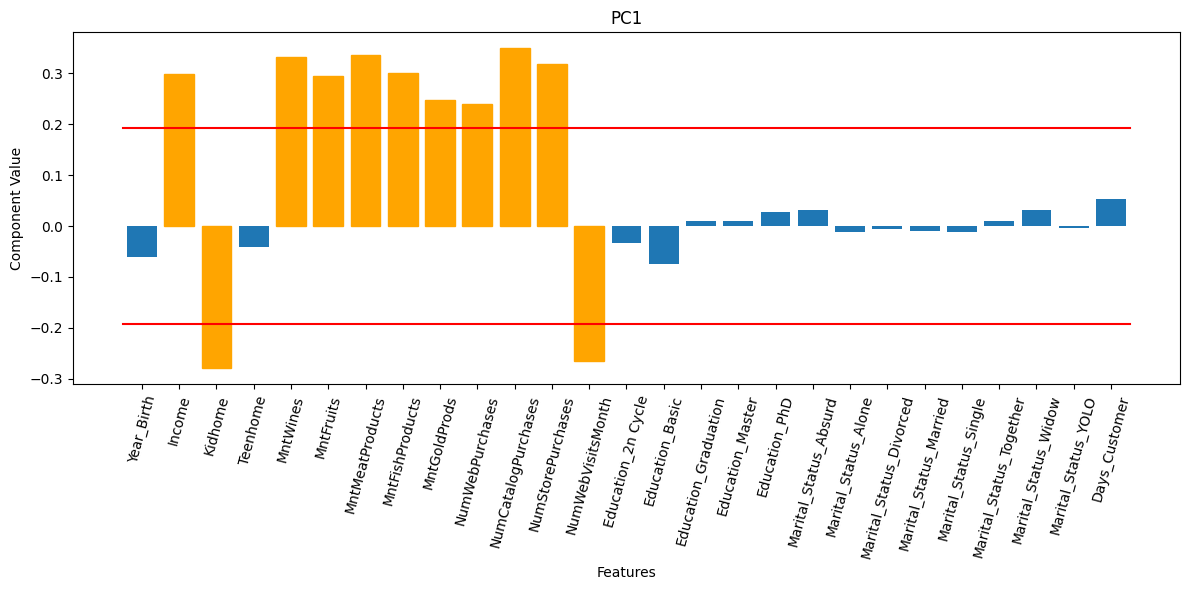

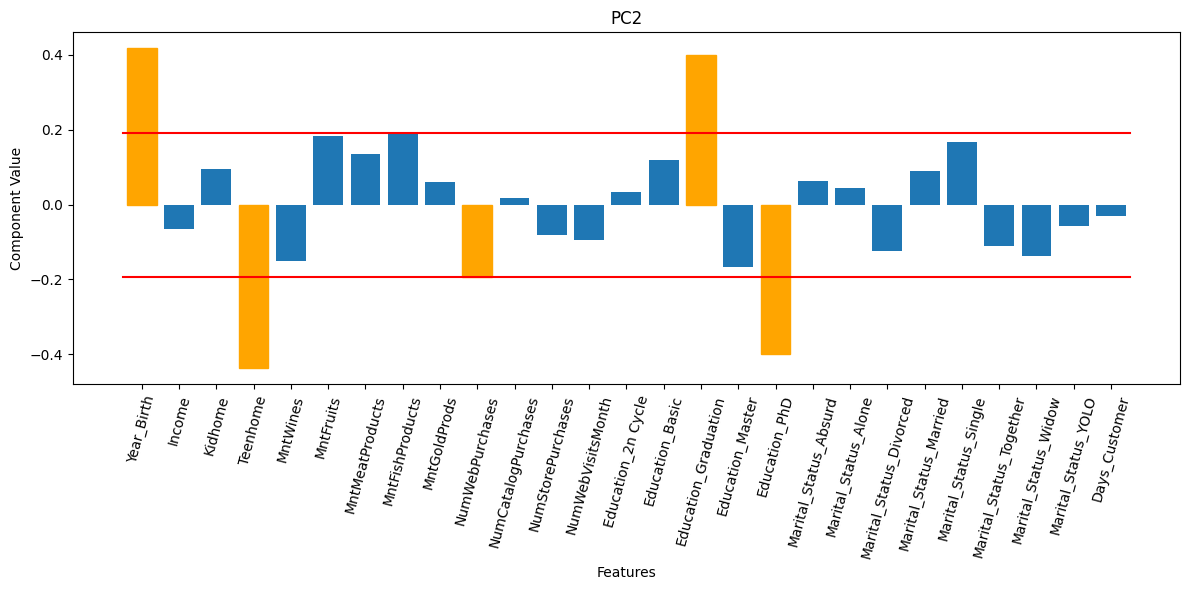

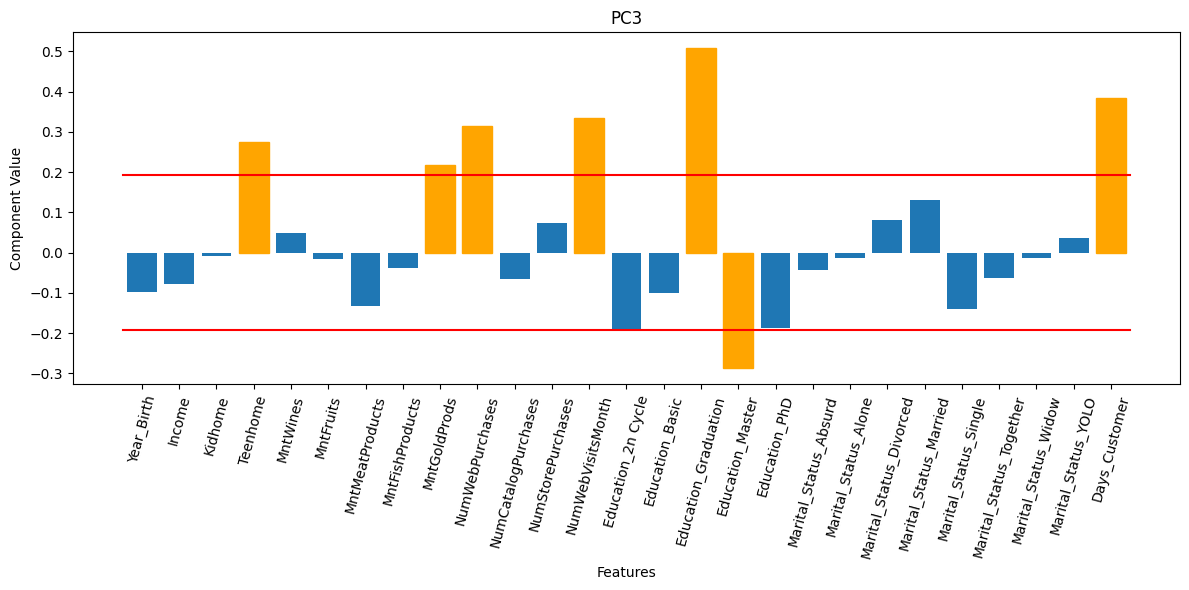

In [ ]:
eps = np.sqrt(1/pca_std.n_features_)

for ii in range(m_std):
    # MAKE THE VARPLOT WITH SKILL TYPE COLORS
    plt.figure(figsize=(12, 6))
    bars = plt.bar(np.arange(pca_std.n_features_in_), pca_std.components_[ii,:])

    # --- RED LINE DENOTING THE THRESHOLD [-eps, +eps] -----------------
    plt.plot([-0.5, pca_std.n_features_in_ - 0.5], [eps, eps], 'red')
    plt.plot([-0.5, pca_std.n_features_in_ - 0.5], [-eps, -eps], 'red')

    # Color bars that are larger than the threshold
    for i, value in enumerate(pca_std.components_[ii,:]):
        if np.abs(value) > eps:
            bars[i].set_color('orange')  # Change the color to your desired color

    # ------------------------------------------------------------------
    plt.xticks(ticks=np.arange(pca_std.n_features_in_), labels=Xworkdf_std.columns, rotation=75)
    plt.title(f'PC{ii + 1}')
    plt.ylabel('Component Value')
    plt.xlabel('Features')
    plt.tight_layout()
    plt.show()

In [ ]:
pca_loading_features = pca_std.components_

pca_loading_features_df = pd.DataFrame(pca_loading_features, columns = Xworkdf_std.columns)

for i in range(pca_loading_features.shape[0]):
  if i == 0 :
    print(pc1)
  elif i == 1 :
    print(pc2)
  else :
    print(pc3)
  print(f'*************************************************************************')
  print(f'**************** Positive correlated features for PC{i+1} *********************')
  for column in Xworkdf_std.columns:
    incidence = pca_loading_features_df.iloc[i, pca_loading_features_df.columns.get_loc(column)]
    if incidence > eps:
      print(f'+{column}')
  print(f'**************** Negative correlated features for PC{i+1} *********************')
  for column in Xworkdf_std.columns:
    incidence = pca_loading_features_df.iloc[i, pca_loading_features_df.columns.get_loc(column)]
    if incidence < -eps:
      print(f'-{column}')
  print()
  print()


   ___  ___   _
  / _ \/ __\ / |
 / /_)/ /    | |
/ ___/ /___  | |
\/   \____/  |_|

*************************************************************************
**************** Positive correlated features for PC1 *********************
+Income
+MntWines
+MntFruits
+MntMeatProducts
+MntFishProducts
+MntGoldProds
+NumWebPurchases
+NumCatalogPurchases
+NumStorePurchases
**************** Negative correlated features for PC1 *********************
-Kidhome
-NumWebVisitsMonth



   ___  ___   ____
  / _ \/ __\ |___ \
 / /_)/ /      __) |
/ ___/ /___   / __/
\/   \____/  |_____|

*************************************************************************
**************** Positive correlated features for PC2 *********************
+Year_Birth
+Education_Graduation
**************** Negative correlated features for PC2 *********************
-Teenhome
-NumWebPurchases
-Education_PhD



   ___  ___   _____
  / _ \/ __\ |___ /
 / /_)/ /      |_ \
/ ___/ /___   ___) |
\/   \____/  |____/

**************

Looking at these graphs, we can propose an interpretation of the principal components: <br>
<br>
####PC1: Wealth & Wellness ( + Incomes, - Kids )
****
According to our interpretation, **the elements that positively influence the first Principal Component are those that ensure a state of well-being that allows the customer to be able to spend their (high) earnings without too much restraint**. The customer in question, having a high PC1 , will tend to treat himself well and not to be deprived of anything. <br>
From the point of view of negative correlations we would like to focus on the **(- KidHome)** feature. In our opinion, **the smaller a household is, the fewer resources it will have to share**. Therefore, the absence of children will cause the customer to be able to devote more resources to himself.
<br> <br>
####PC2: Young Active Adults ( + Younger, - Lazy )
****
What we can infer from this second Principal Component is mainly related to the age of the customer. The younger he/she is **(+Year_Birth)** the greater the probability that he/she is a graduate **(+Education_Gratuation)**  and not at an advanced stage of education such as PhD **(-Education_PhD)** .
As for the high purchase of fish **(+MntFishProducts)**  we can make it related to being young and therefore playing sports and eating healthy. <br>On the other hand, the number of web purchases **(-NumWebPurchases)**  decrease as the younger the customer is, what we can assume is that a young person tends more to go physically to purchase their goods, since they have the strength to be able to do so.
Last observation for **(-TeenHome)**  is given by the fact that the older the Customer is, hence the less young, the fewer teenagers he will have at home : an older gentleman will tend to have either very young grandchildren or children who are already adults, so this observation is consistent with our interpretation! <br>
<br>

####PC3: Tech-Competent ( + Nerd, - Master/PhD )
****
Customers in this category exhibit a strong online presence **(+NumWebVisitsMonth)**, engage in frequent web interactions**(+NumWebPurchases)**, have teenagers at home, and show a preference for gold products**(+MntGoldProds)**. While education at the graduation level is positively associated, higher academic degrees like master's and Ph.D. are less common in this segment. <br> We could define this category as technology lovers , almost 'nerds'. This type of customer could be someone who has always had a passion for a certain type of technology to such an extent that he or she did not want to finish the full college cycle in order to work on it as soon as possible.

<br>
<br>
<br>

_(I would like to clarify that wellness means solely and exclusively from an economic point of view. Any psycho-physical assumption in this analysis is absent.)_

In [ ]:
names_std=['Wealth_Wellness','Young_Active_Adults','Tech-Competent']

### ▶ 4.1.2 **Xworkdf_mm** --> n_components = 2

In [ ]:
pca_mm = PCA(n_components = min(m_mm,5), random_state= rs)
Xworkdf_mm_pca = pca_mm.fit_transform(Xworkdf_mm)

In [ ]:
print(f'The number of input features before the PCA is : {pca_mm.n_features_in_}')
print(f'Principal axes in feature space, representing the directions of maximum variance in the data.shape : {pca_mm.components_.shape}')
print(f'Data after PCA.shape : {Xworkdf_mm_pca.shape}'),
print(f'Data before PCA.shape : {Xworkdf_mm.shape}')

The number of input features before the PCA is : 27
Principal axes in feature space, representing the directions of maximum variance in the data.shape : (2, 27)
Data after PCA.shape : (1473, 2)
Data before PCA.shape : (1473, 27)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


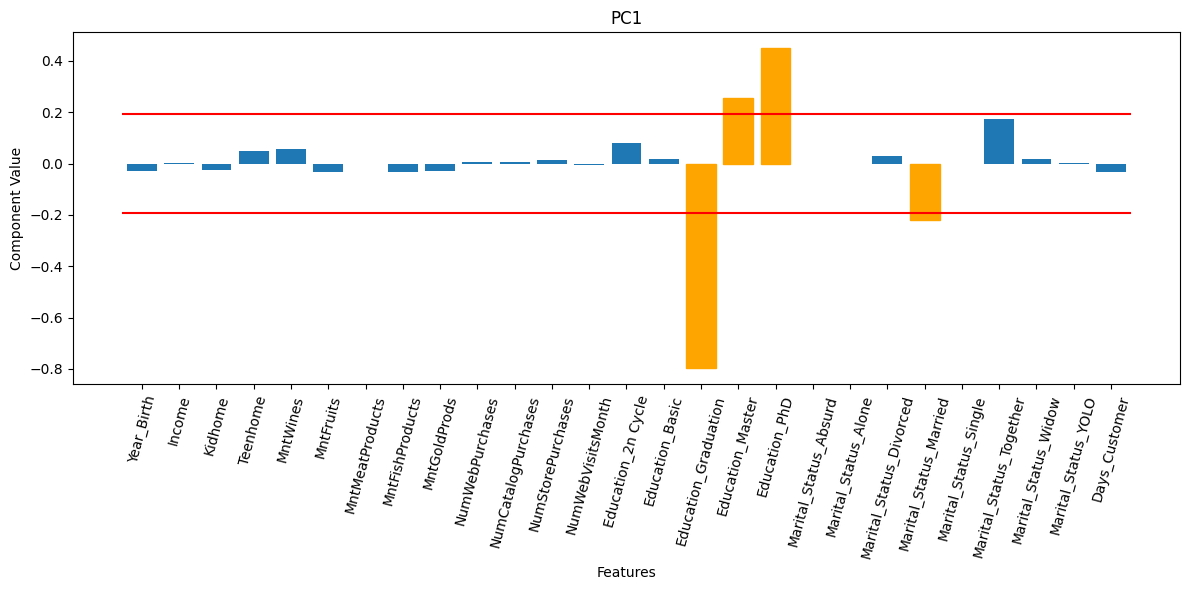

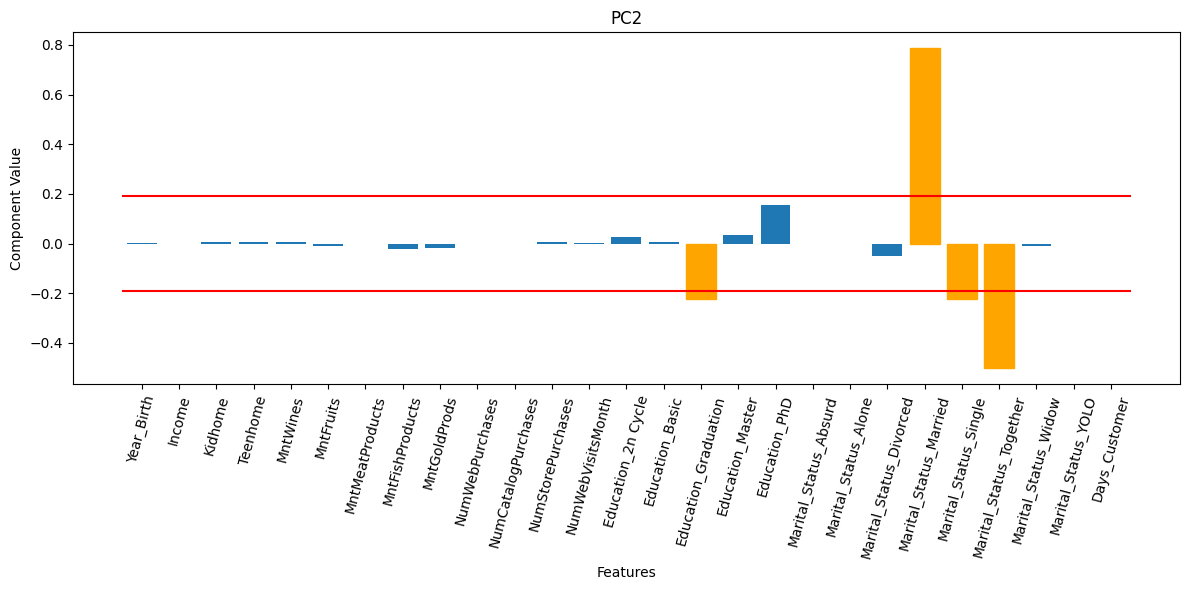

In [ ]:
eps = np.sqrt(1/pca_mm.n_features_)

for ii in range(m_mm):
    # MAKE THE VARPLOT WITH SKILL TYPE COLORS
    plt.figure(figsize=(12, 6))
    bars = plt.bar(np.arange(pca_mm.n_features_in_), pca_mm.components_[ii,:])

    # --- RED LINE DENOTING THE THRESHOLD [-eps, +eps] -----------------
    plt.plot([-0.5, pca_mm.n_features_in_ - 0.5], [eps, eps], 'red')
    plt.plot([-0.5, pca_mm.n_features_in_ - 0.5], [-eps, -eps], 'red')

    # Color bars that are larger than the threshold
    for i, value in enumerate(pca_mm.components_[ii,:]):
        if np.abs(value) > eps:
            bars[i].set_color('orange')  # Change the color to your desired color

    # ------------------------------------------------------------------
    plt.xticks(ticks=np.arange(pca_mm.n_features_in_), labels=Xworkdf_mm.columns, rotation=75)
    plt.title(f'PC{ii + 1}')
    plt.ylabel('Component Value')
    plt.xlabel('Features')
    plt.tight_layout()
    plt.show()

In [ ]:
pca_loading_features = pca_mm.components_

pca_loading_features_df = pd.DataFrame(pca_loading_features, columns = Xworkdf_mm.columns)

for i in range(pca_loading_features.shape[0]):
  if i == 0 :
    print(pc1)
  elif i == 1 :
    print(pc2)
  else :
    print(pc3)
  print(f'***************************************************************************')
  print(f'**************** Positive correlated features for PC{i+1} *********************')
  for column in Xworkdf_mm.columns:
    incidence = pca_loading_features_df.iloc[i, pca_loading_features_df.columns.get_loc(column)]
    if incidence > eps:
      print(f'+{column}')
  print(f'**************** Negative correlated features for PC{i+1} *********************')
  for column in Xworkdf_mm.columns:
    incidence = pca_loading_features_df.iloc[i, pca_loading_features_df.columns.get_loc(column)]
    if incidence < -eps:
      print(f'-{column}')
  print()
  print()


   ___  ___   _
  / _ \/ __\ / |
 / /_)/ /    | |
/ ___/ /___  | |
\/   \____/  |_|

***************************************************************************
**************** Positive correlated features for PC1 *********************
+Education_Master
+Education_PhD
**************** Negative correlated features for PC1 *********************
-Education_Graduation
-Marital_Status_Married



   ___  ___   ____
  / _ \/ __\ |___ \
 / /_)/ /      __) |
/ ___/ /___   / __/
\/   \____/  |_____|

***************************************************************************
**************** Positive correlated features for PC2 *********************
+Marital_Status_Married
**************** Negative correlated features for PC2 *********************
-Education_Graduation
-Marital_Status_Single
-Marital_Status_Together




The result coming from this one, instead, seems more simple to analyse. This means that we could guess better the meaning of those values, but will be more difficult to understand the customer's needs.

####PC1: Academic ( + PhD/Master, - MaritalStatus )
****
In the first PC (representing the greatest variance) we find the customers who have finished the highest levels of study **(+Education_Master)(+Education_PhD)** and are not married **(-Marital_Status_Married)**.
<br> <br>
####PC2: Married ( + MaritalStatus )
****
Unfortunately, the information here is redundant and complementary (rightly so) to that of the first PC. We will call this feature simply as married customers.

In [ ]:
names_mm = ['Academic','Married']

### ▶ 4.2.1 **Xworkdf_std** --> _SCOREGRAPH_ _(DiscountAnalysis & AcceptedCampaign)_

Let's see if the data in the new obtained space, have already a clustered shape.

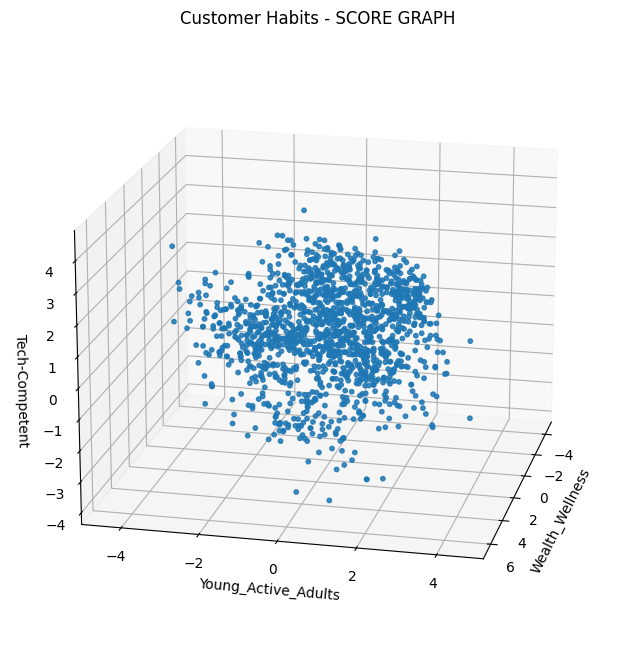

<Figure size 640x480 with 0 Axes>

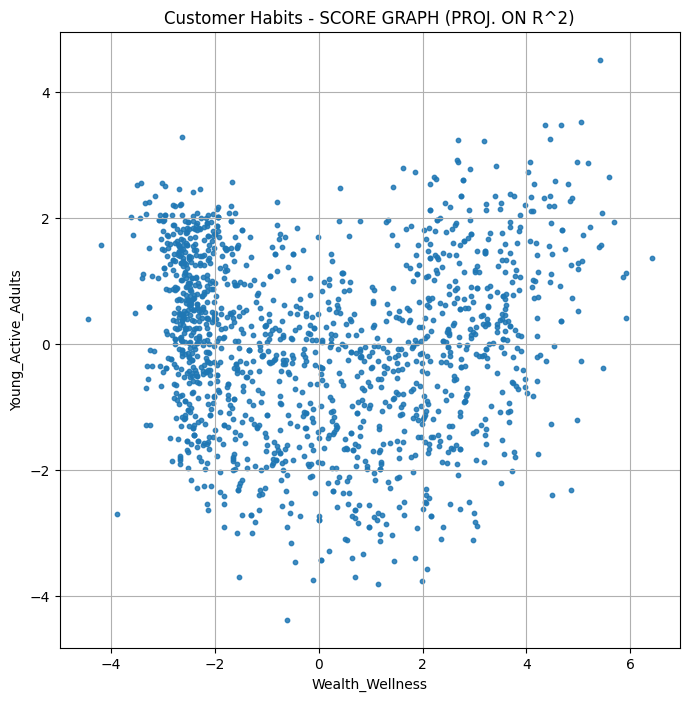

In [ ]:
# Data in the new space :
Y = Xworkdf_std_pca

plt.close('all')

# 3Dplot ‐ Generic scoregraph :
sg_3d = plt.figure(figsize=(8, 8))
ax_sg_3d = sg_3d.add_subplot(111, projection='3d')
ax_sg_3d.scatter(Y[:,0], Y[:,1], Y[:,2], s=10, alpha = .85)
plt.title('Customer Habits - SCORE GRAPH')
ax_sg_3d.set_xlabel(names_std[0])
ax_sg_3d.set_ylabel(names_std[1])
ax_sg_3d.set_zlabel(names_std[2])
ax_sg_3d.view_init(elev=18, azim = 13)


# 2Dplot - SCORE GRAPH
plt.figure()
plt.figure(figsize=(8,8))
plt.scatter(Y[:,0], Y[:,1], s=10, alpha = .85)
plt.title('Customer Habits - SCORE GRAPH (PROJ. ON R^2)')
plt.xlabel(names_std[0])
plt.ylabel(names_std[1])
plt.grid()
plt.show()

In the $R^2$ space we can see a more definite distribution than in $R^3$, but still they are not too obviously separated. <br> <br>
Let us test a few labels to see if a correlation between our assumptions and the labels exists anyway. <br>
* For the label *NumDealsPurchases* we decided to transform it as :
>%$DealsPurchases$ = <br>
>$NumDealsPurchases/TotPurchases$ <br> <br>
where $TotPurchases$= <br>
> = $NumWebPurchases+ NumCatalogPurchases + NumStorePurchases$ <br><br>
Then the new label will be :  <br>
\
\begin{cases}
    Discount = 1 & \text{if %DealsPurchases >= 0.5} \\
    Discount = 0 & \text{if %DealsPurchases <  0.5 }
\end{cases}

This means that the new Discount label is 'positive' if and only if the customer tends to buy goods with a promotion more than half the time. This can help us represent a certain type of customer base.


In [ ]:
tot_purchases = workdf['NumWebPurchases'].values + workdf['NumCatalogPurchases'].values + workdf['NumStorePurchases'].values

# Convert arrays to float64 before performing division
num_deals_purchases = workdf['NumDealsPurchases'].values.astype(np.float64)
tot_purchases = tot_purchases.astype(np.float64)

# Perform division, setting result to 0 where denominator is 0
perc_discount = np.divide(num_deals_purchases, tot_purchases, where=(tot_purchases != 0), out=np.zeros_like(tot_purchases))

discount_label = np.where(perc_discount > 0.5 ,1,0)

* For the labels *AcceptedCmp1, .. , AcceptedCmp5, Response* instead we decided to group them into a sigle label: <br>
 $SumAccepted$ =
 $(\sum_{k = 1}^5  AcceptedCmpk ) + Response $ <br>

 then :

>  \
\begin{cases}
    AcceptedCampaign = 1 & \text{if SumAccepted >= 1} \\
    AcceptedCampaign = 0 & \text{if SumAccepted = 0 }
\end{cases}


In [ ]:
accepted_cmpk = (
    workdf['AcceptedCmp1'].values +
    workdf['AcceptedCmp2'].values +
    workdf['AcceptedCmp3'].values +
    workdf['AcceptedCmp4'].values +
    workdf['AcceptedCmp5'].values
)

sum_accepted = accepted_cmpk + workdf['Response'].values
accepted_campaign = np.where(sum_accepted >= 1, 1, 0)

Now let's plot , befor for the DiscountAnalysis label and the for the AcceptedCampaign label:

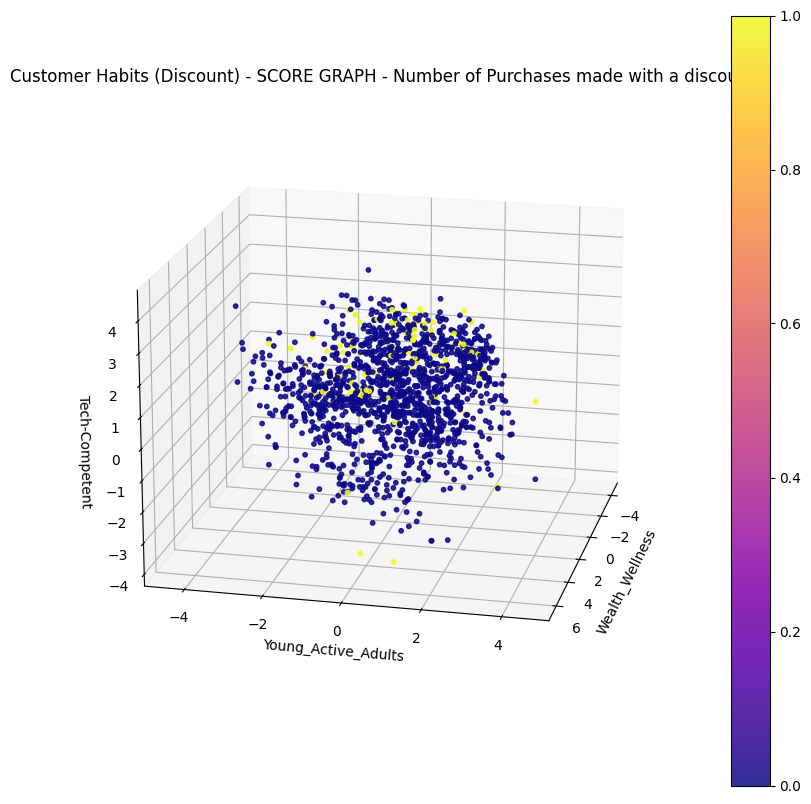

<Figure size 640x480 with 0 Axes>

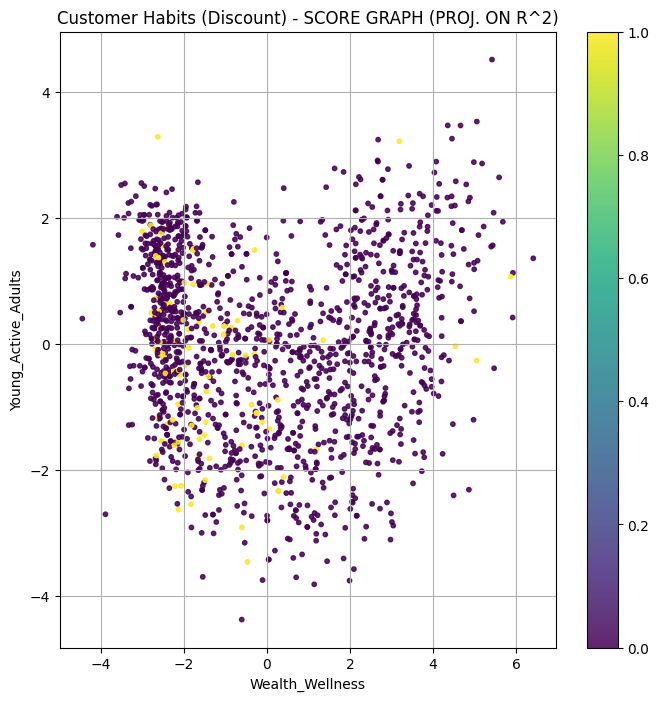

<Figure size 640x480 with 0 Axes>

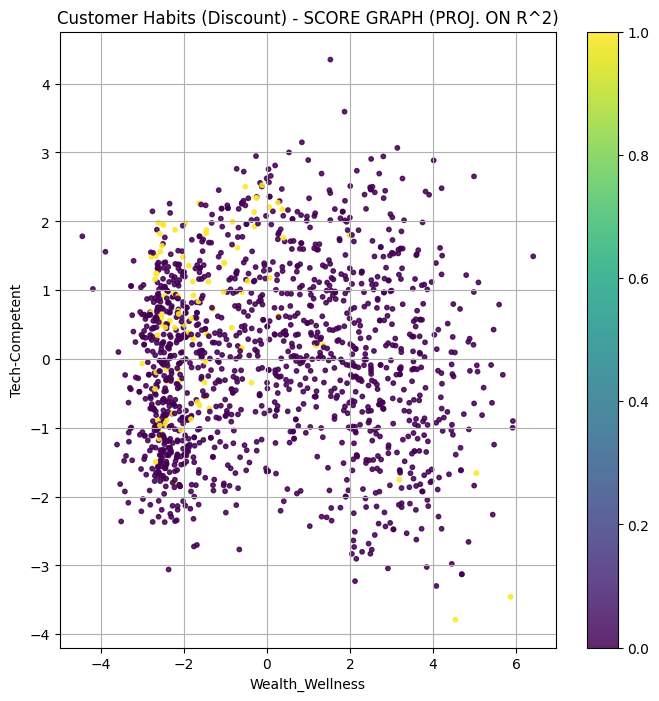

In [ ]:
# I would like to test label NumDealsPurhases,
Y_std = Xworkdf_std_pca

# 3Dplot ‐ %discount
sg_3d = plt.figure(figsize=(10, 10))
ax_sg_3d = sg_3d.add_subplot(111, projection='3d')
discount = ax_sg_3d.scatter(Y_std[:,0], Y_std[:,1], Y_std[:,2], s=10 , c = discount_label, alpha = 0.85, cmap='plasma')
plt.colorbar(discount)
plt.title('Customer Habits (Discount) - SCORE GRAPH - Number of Purchases made with a discount' )
ax_sg_3d.set_xlabel(names_std[0])
ax_sg_3d.set_ylabel(names_std[1])
ax_sg_3d.set_zlabel(names_std[2])
ax_sg_3d.view_init(elev=18, azim = 13)

# 2Dplot - $discount
plt.figure()
plt.figure(figsize=(8,8))
discount_2d = plt.scatter(Y_std[:,0], Y_std[:,1], s=10, c = discount_label ,alpha = .85)
plt.colorbar(discount_2d)

plt.title('Customer Habits (Discount) - SCORE GRAPH (PROJ. ON R^2)')
plt.xlabel(names_std[0])
plt.ylabel(names_std[1])
plt.grid()
plt.show()

# 2Dplot - $discount
plt.figure()
plt.figure(figsize=(8,8))
discount_2d = plt.scatter(Y_std[:,0], Y_std[:,2], s=10, c = discount_label ,alpha = .85)
plt.colorbar(discount_2d)

plt.title('Customer Habits (Discount) - SCORE GRAPH (PROJ. ON R^2)')
plt.xlabel(names_std[0])
plt.ylabel(names_std[2])
plt.grid()
plt.show()

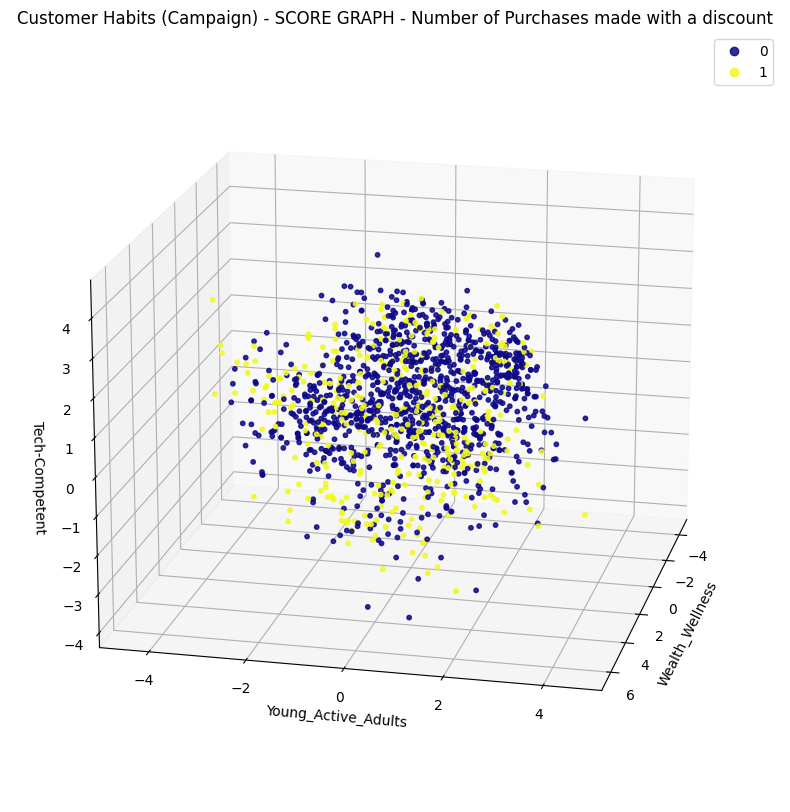

<Figure size 640x480 with 0 Axes>

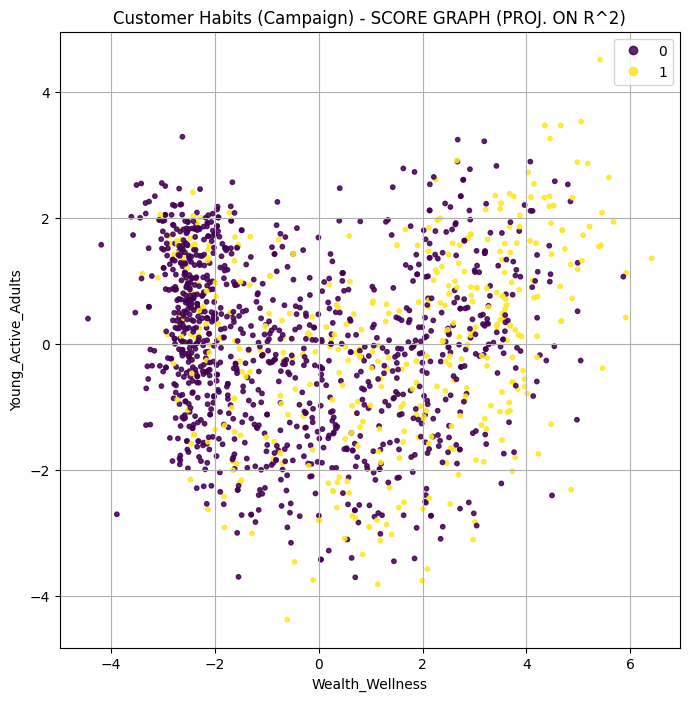

<Figure size 640x480 with 0 Axes>

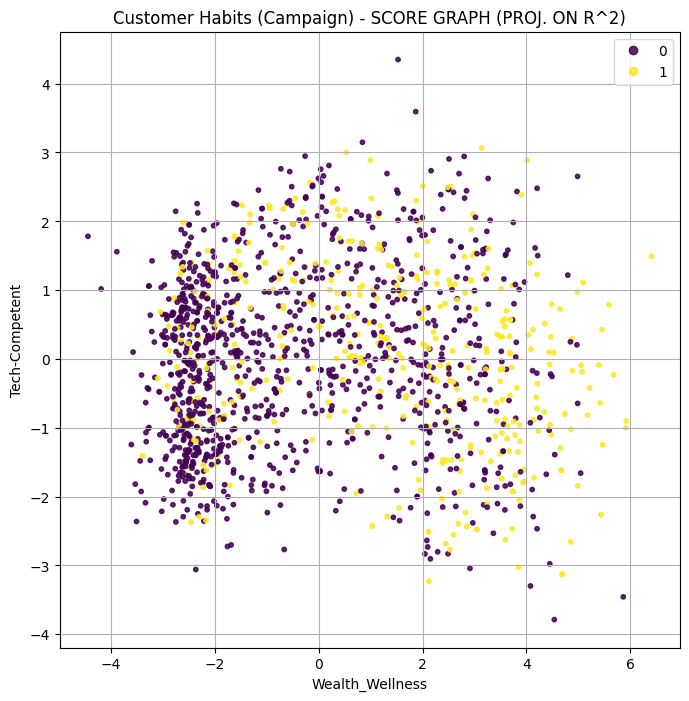

In [ ]:
# 3Dplot ‐ %campaign
sg_3d = plt.figure(figsize=(10, 10))
ax_sg_3d = sg_3d.add_subplot(111, projection='3d')
campaign = ax_sg_3d.scatter(Y_std[:,0], Y_std[:,1], Y_std[:,2], s=10 , c = accepted_campaign, alpha = 0.85, cmap='plasma')
plt.legend(handles=campaign.legend_elements()[0], labels=[0,1], loc='upper right')
plt.title('Customer Habits (Campaign) - SCORE GRAPH - Number of Purchases made with a discount' )
ax_sg_3d.set_xlabel(names_std[0])
ax_sg_3d.set_ylabel(names_std[1])
ax_sg_3d.set_zlabel(names_std[2])
ax_sg_3d.view_init(elev=18, azim = 13)

# 2Dplot - $campaign
plt.figure()
plt.figure(figsize=(8,8))
campaign_2d1 = plt.scatter(Y_std[:,0], Y_std[:,1], s=10, c = accepted_campaign ,alpha = .85)
plt.legend(handles=campaign_2d1.legend_elements()[0], labels=[0,1], loc='upper right')

plt.title('Customer Habits (Campaign) - SCORE GRAPH (PROJ. ON R^2)')
plt.xlabel(names_std[0])
plt.ylabel(names_std[1])
plt.grid()
plt.show()

# 2Dplot - $campaign
plt.figure()
plt.figure(figsize=(8,8))
campaign_2d2 = plt.scatter(Y_std[:,0], Y_std[:,2], s=10, c = accepted_campaign,alpha = .85)
plt.legend(handles=campaign_2d2.legend_elements()[0], labels=[0,1], loc='upper right')

plt.title('Customer Habits (Campaign) - SCORE GRAPH (PROJ. ON R^2)')
plt.xlabel(names_std[0])
plt.ylabel(names_std[2])
plt.grid()
plt.show()

One observation that may comfort us about our interpretation of the first PC (Wealth_Wellness) is : <br>
<br>
**Discount Analysis** : <br>
The less well off the customer is, the more he or she will tend to buy goods only when he or she gets some discount. We also notice (from the last graph) how there is a subtle tendency on the part of major tech competent to buy goods at a discount.<br>


**Campaign Analysis** : <br>
As we expected the campaigns are more interested in rich people.


### ▶ 4.2.2 **Xworkdf_mm** --> _SCOREGRAPH_ _(DiscountAnalysis & AcceptedCampaign)_

<Figure size 640x480 with 0 Axes>

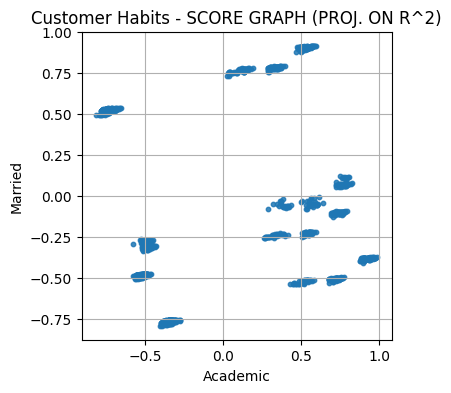

In [ ]:
# Data in the new space :
Y_mm = Xworkdf_mm_pca

plt.close('all')

# 2Dplot - SCORE GRAPH
plt.figure()
plt.figure(figsize=(4,4))
plt.scatter(Y_mm[:,0], Y_mm[:,1], s=10, alpha = .85)
plt.title('Customer Habits - SCORE GRAPH (PROJ. ON R^2)')
plt.xlabel(names_mm[0])
plt.ylabel(names_mm[1])
plt.grid()
plt.show()

With the mm scaler, we notice that the data are broken down much more clearly respect to the standard scaler ones. <br>
Potentially we already could identify 4 categories of customers: <br>
1. Married with low educational level
2. Married with high educational level
3. Not Married with low educational level
4. Not Married with high educational level






<Figure size 640x480 with 0 Axes>

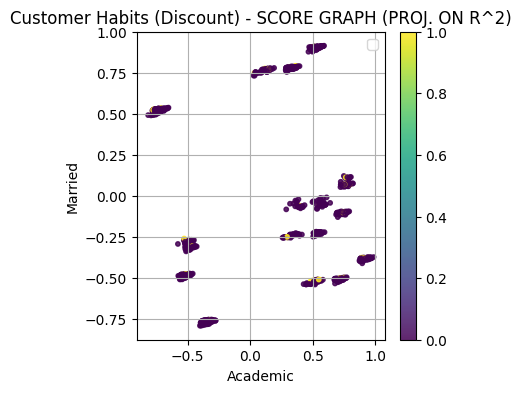

<Figure size 640x480 with 0 Axes>

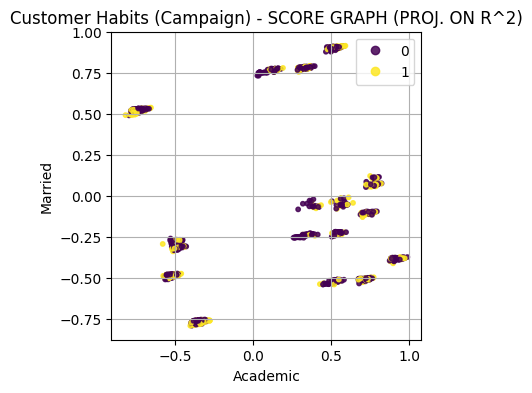

In [ ]:
plt.close('all')

# 2Dplot - SCORE GRAPH
plt.figure()
plt.figure(figsize=(4,4))
scatter1 = plt.scatter(Y_mm[:,0], Y_mm[:,1], s=10, c = discount_label,  alpha = .85)
plt.colorbar(scatter1)
plt.title('Customer Habits (Discount) - SCORE GRAPH (PROJ. ON R^2)')
plt.xlabel(names_mm[0])
plt.ylabel(names_mm[1])
plt.legend()
plt.grid()
plt.show()

# 2Dplot - SCORE GRAPH
plt.figure()
plt.figure(figsize=(4,4))
scatter2 = plt.scatter(Y_mm[:,0], Y_mm[:,1], s=10, c = accepted_campaign,  alpha = .85)
plt.legend(handles=scatter2.legend_elements()[0], labels=[0,1], loc='upper right')
plt.title('Customer Habits (Campaign) - SCORE GRAPH (PROJ. ON R^2)')
plt.xlabel(names_mm[0])
plt.ylabel(names_mm[1])
plt.grid()
plt.show()

**Discount Analysis** : <br>
The +married and +educational_level category of customers (thus the top right group), are those who use few discounts.
<br>


**Campaign Analysis** : <br>
Always them (+married, +educational_level), are the ones who accept less the campaign.


<br>

So through applied PCA to scaled mm data, we have already identified a subcategory of customers.

## Exercise 5 (k-Means): Run the k-Means algorithm on the two DFs, with respect to the “PC-space”. <br>
Select the best value of $k \in (3, . . . , 10) $ using the silhouette coefficient.

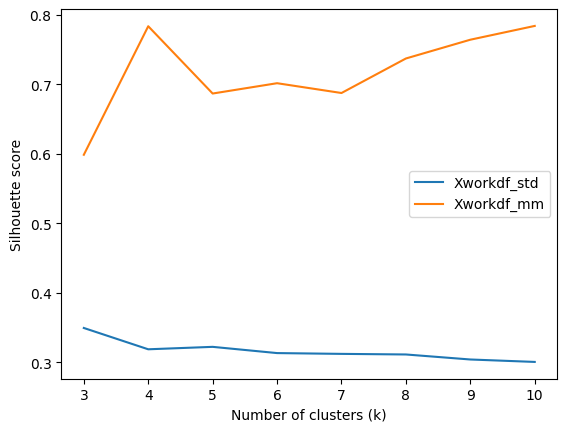

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create an empty list to store the silhouette scores
silhouette_scores_std=[]
silhouette_scores_mm=[]

# Iterate through the range of k values
for k in range(3,11):
# Apply k‐means cluster on Xworkdf_std_pca
  kmeans=KMeans(n_clusters= k, random_state=rs, n_init = 'auto' , algorithm = 'lloyd')
  labels_std=kmeans.fit_predict(Xworkdf_std_pca)
  labels_mm=kmeans.fit_predict(Xworkdf_mm_pca)

  # Calculate the silhouette score for this k value
  score_std=silhouette_score(Xworkdf_std_pca,labels_std)
  score_mm=silhouette_score(Xworkdf_mm_pca,labels_mm)
  # Append the silhouette score to the list
  silhouette_scores_std.append(score_std)
  silhouette_scores_mm.append(score_mm)

# Plot the silhouette scores for different values of k
plt.close('all')
plt.plot(range(3,11), silhouette_scores_std, label='Xworkdf_std')
plt.plot(range(3,11), silhouette_scores_mm, label='Xworkdf_mm')
plt.legend()
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.show()

The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a score close to 1 indicates that the object is well-matched to its own cluster and far from other clusters, and a score close to -1 indicates that the object is mis-matched to its own cluster and possibly should have been assigned to a different cluster.

When analyzing the graph of silhouette score vs number of clusters, the goal is to find the ‘elbow’ in the graph, which is the point where the silhouette score starts to decrease at a slower rate. This point is considered the optimal number of clusters because it represents a balance between having too many clusters (resulting in clusters with low silhouette scores) and too few clusters (resulting in clusters with high similarity to other clusters).

For these reasons, the optimal number of clusters for our problem might be $k=4$ for the minmax case. <br>
The number of clusters for the std case will be $k=3$ . <br>

In [ ]:
k_std = 3
k_mm =  4

## Exercise 6 Clusters and Centroid Interpretation and Visualization:
Comment the centroids of the best clustering for both the DFs. <br> In particular, give to each centroid a name or a meaningful brief description that characterizes the average customer in the cluster represented by the centroid.
Moreover, plot the score graph of _exercise 4_ together with the centroids. <br> In particular, show the different clusters using different colors and/or markers for the dots.

### 6.1.1  Xworkdf_std_pca

#### Cluster Visualizaiton

In [ ]:
X = Xworkdf_std_pca

kmeans = KMeans(n_clusters = k_std, random_state=rs ,n_init = 'auto')
kmeans.fit(X)

y_pred = kmeans.predict(X)
silhouette_avg = silhouette_score(X , y_pred)

print( "The average silhouette score for the clustering is꞉" , silhouette_avg)

The average silhouette score for the clustering is꞉ 0.3491468868034197


<ipython-input-52-6a7dbba55518>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('gist_rainbow', k_std)


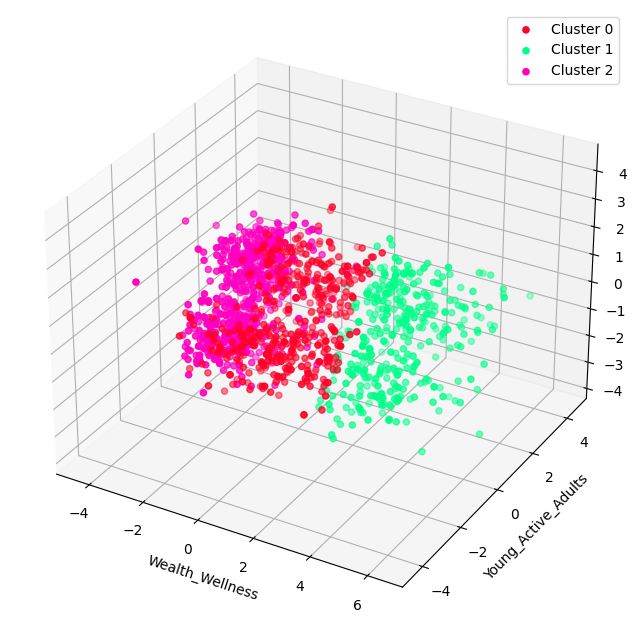

In [ ]:
clust = plt.figure(figsize = (8,8))
ax = clust.add_subplot(projection='3d')
ax.set_xlabel(names_std[0])
ax.set_ylabel(names_std[1])
ax.set_zlabel(names_std[2])

# Random k‐colormap
cmap = plt.cm.get_cmap('gist_rainbow', k_std)
colors = cm.tab20.colors
# Make a scatter plot for each cluster, using every time adifferent color
for i in range(0,k_std):
  filtered = X[y_pred==i] #take just the data point with class i
  ax.scatter(filtered[:, 0], filtered[:, 1], filtered[:, 2], c=[cmap(i) for _ in range(filtered.shape[0])], label=f'Cluster {i}')
#ax.view_init(elev=20, azim=200)
ax.legend()
plt.show()

We can observe that the clustering seems to be not of good quality, as there are many clusters touching in the centre. <br>
This also is confirmed by the low sihlouette score, that tells us it is difficult to choose one cluster w.r.t. another. <br>
<br>
One reason behing this might be the lowest requirement of kept variance, during the PCA process.

#### Centroid Visualizaiton

<ipython-input-53-493ee62df1c0>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('gist_rainbow', k_std)


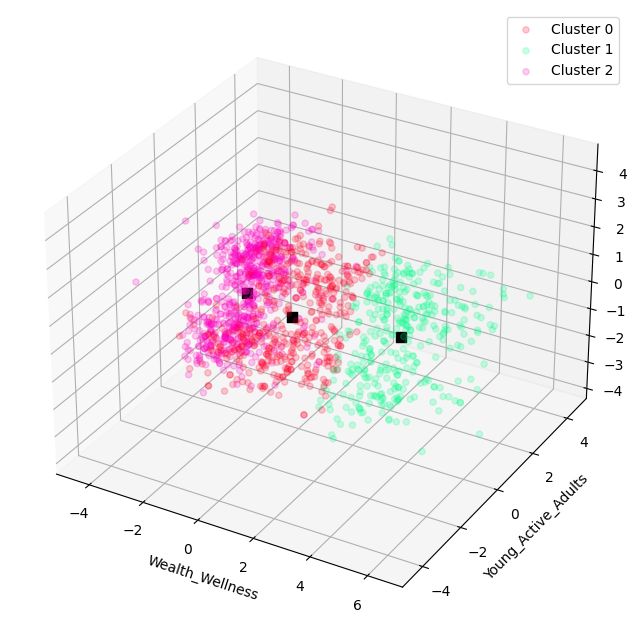

In [ ]:
clust = plt.figure(figsize = (8,8))
ax = clust.add_subplot(projection='3d')
ax.set_xlabel(names_std[0])
ax.set_ylabel(names_std[1])
ax.set_zlabel(names_std[2])

# Random k‐colormap
cmap = plt.cm.get_cmap('gist_rainbow', k_std)
# Make a scatter plot for each cluster, using every time adifferent color
for i in range(0,k_std):
  filtered = X[y_pred==i] #take just the data point with class i
  ax.scatter(filtered[:, 0], filtered[:, 1], filtered[:, 2], c=[cmap(i) for _ in range(filtered.shape[0])], label=f'Cluster {i}', alpha=0.2)
  center = kmeans.cluster_centers_[i]
  ax.scatter(center[0],center[1], center[2], color = 'black', marker='s', s = 50)

#ax.view_init(elev=20, azim=200)
ax.legend()
plt.show()

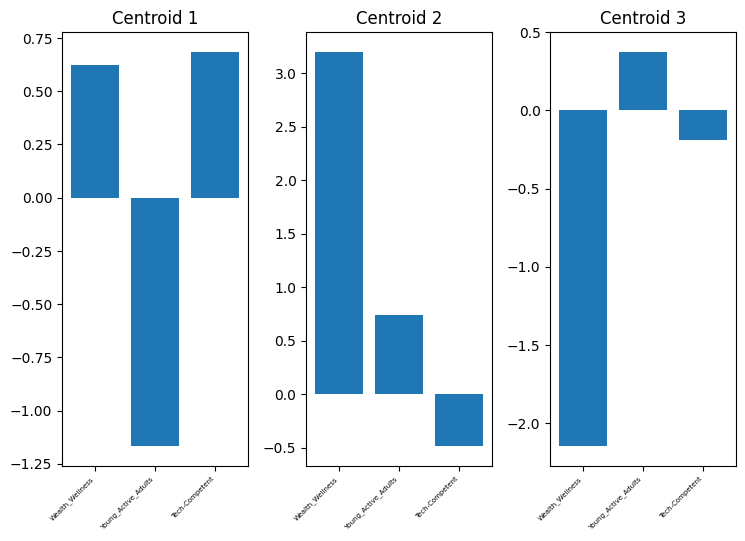

In [ ]:
plt.close('all')
plt.figure(figsize=(10,10))
for i in range(0,k_std):
  plt.subplot(2,4,i+1)
  plt.bar(names_std,kmeans.cluster_centers_[i,:])
  plt.title(f'Centroid {i+1}')
  plt.xticks(ticks = np.arange(len(names_std)), labels= names_std, rotation=45,  ha='right', size=5)
  plt.tight_layout()

plt.show()

We can interpret the centroids as the following: <br>
* Centroid 1 = Aged Enthusiast Customer
* Centroid 2 = Wealthy Customer  
* Centroid 3 = Low-income Customer
<br>

The fact that the third class is the complementary of the second class makes the analysis somewhat disappointing.


### 6.1.2  Xworkdf_mm_pca

#### Cluster Visualizaiton

In [ ]:
X = Xworkdf_mm_pca

kmeans = KMeans(n_clusters = k_mm, random_state=rs ,n_init = 'auto')
kmeans.fit(X)

y_pred = kmeans.predict(X)
silhouette_avg = silhouette_score(X , y_pred)

print( "The average silhouette score for the clustering is꞉" , silhouette_avg)

The average silhouette score for the clustering is꞉ 0.7831812772680582


<ipython-input-56-ff9e607f9310>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('gist_rainbow', k_mm)


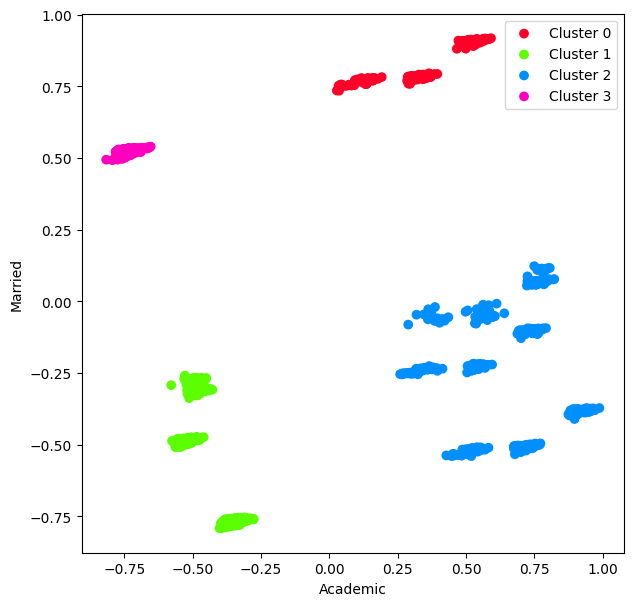

In [ ]:
clust = plt.figure(figsize = (7,7))
ax = clust.add_subplot()
ax.set_xlabel(names_mm[0])
ax.set_ylabel(names_mm[1])

# Random k‐colormap
cmap = plt.cm.get_cmap('gist_rainbow', k_mm)
colors = cm.tab20.colors
# Make a scatter plot for each cluster, using every time adifferent color
for i in range(0,k_mm):
  filtered = X[y_pred==i] #take just the data point with class i
  ax.scatter(filtered[:, 0], filtered[:, 1],c=[cmap(i) for _ in range(filtered.shape[0])], label=f'Cluster {i}')


#ax.view_init(elev=20, azim=200)
ax.legend()
plt.show()

#### Centroid Visualizaiton

<ipython-input-57-d3210d9a50a4>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('gist_rainbow', k_mm)


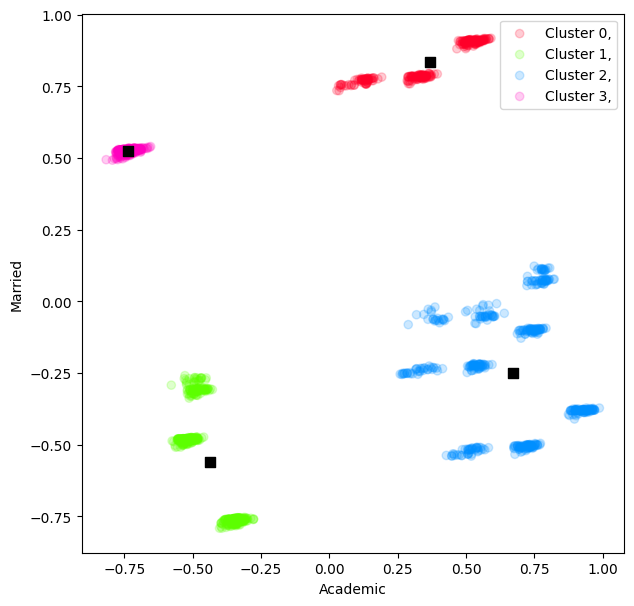

In [ ]:
clust = plt.figure(figsize = (7,7))
ax = clust.add_subplot()
ax.set_xlabel(names_mm[0])
ax.set_ylabel(names_mm[1])

# Random k‐colormap
cmap = plt.cm.get_cmap('gist_rainbow', k_mm)
colors = cm.tab20.colors
# Make a scatter plot for each cluster, using every time adifferent color
for i in range(0,k_mm):
  filtered = X[y_pred==i] #take just the data point with class i
  ax.scatter(filtered[:, 0], filtered[:, 1],c=[cmap(i) for _ in range(filtered.shape[0])], label=f'Cluster {i},', alpha = 0.2)
  center = kmeans.cluster_centers_[i]
  ax.scatter(center[0],center[1], color = 'black', marker='s', s = 50)


#ax.view_init(elev=20, azim=200)
ax.legend()
plt.show()

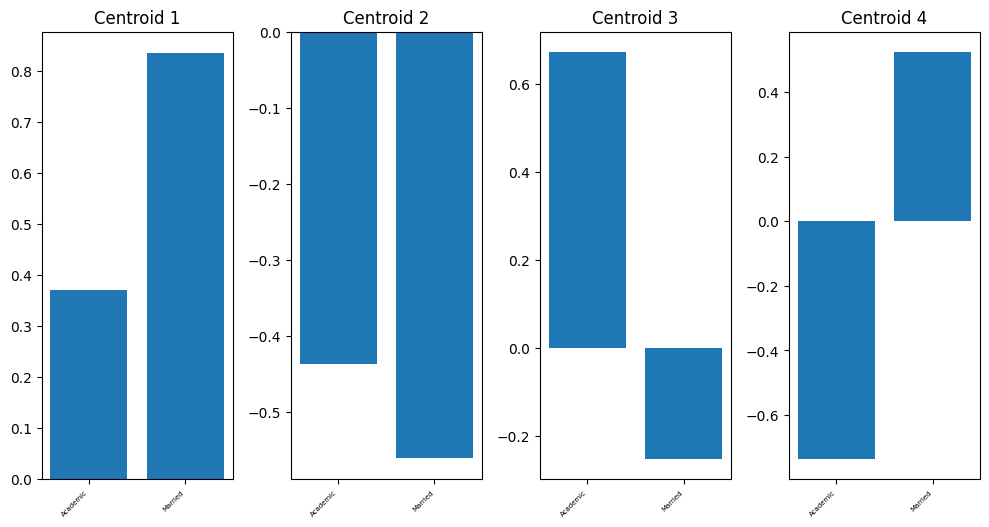

In [ ]:
plt.close('all')
plt.figure(figsize=(10,10))
for i in range(0,k_mm):
  plt.subplot(2,4,i+1)
  plt.bar(names_mm,kmeans.cluster_centers_[i,:])
  plt.title(f'Centroid {i+1}')
  plt.xticks(ticks = np.arange(len(names_mm)), labels= names_mm, rotation=45,  ha='right', size=5)
  plt.tight_layout()

plt.show()

We can interpret the centroids as the following: <br>
* Centroid 1 = Married Academic Customer
* Centroid 2 = Unmarried non-Academic Customer
* Centroid 3 = UnMarried Academic Customer
* Centroid 4 = Married non-Academic Customer
<br>

The meaning that could be drawn from these categories of customers may be poor. However, at least we have a clear breakdown of these categories.

##  Exercise 7 - Clusters and Centroids Evaluation:

In [ ]:
from sklearn.metrics import silhouette_samples

For both the DFs, perform an internal and an external evaluation of the clusterings obtained. In particular:

### 7.1 Measure the silhouette scores of the clusters **(internal evaluation)**:

#### 7.1.1 *Xworkdf_std_pca*

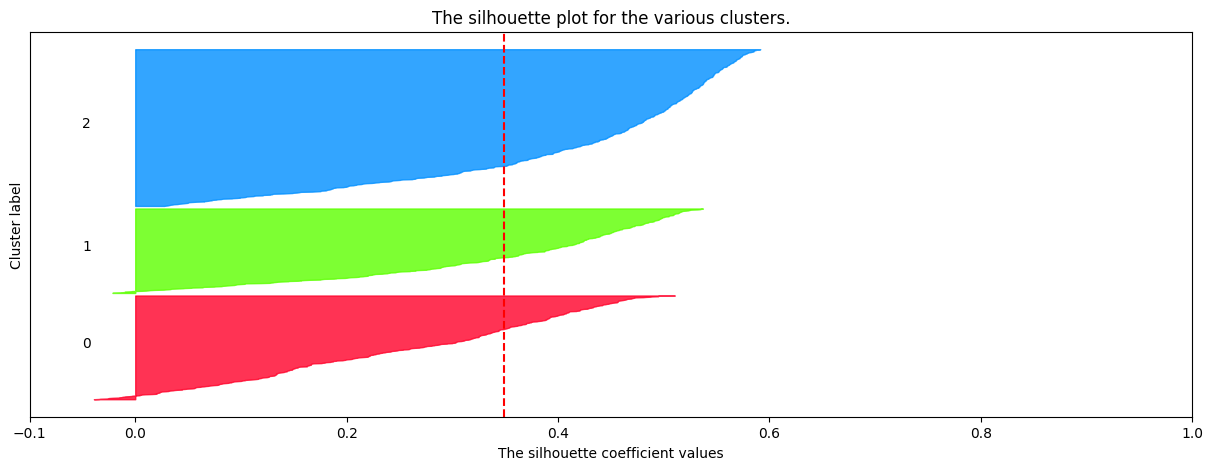

In [ ]:
X = Xworkdf_std_pca

kmeans = KMeans(n_clusters = k_std, random_state=rs ,n_init = 'auto')
kmeans.fit(X)

y_pred = kmeans.predict(X)
silhouette_avg = silhouette_score(X , y_pred)

# Return an array with all the silhouette score for each data !
sample_silhouette_values = silhouette_samples(X, y_pred)
sample_silhouette_values

y_lower = 10


fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(15, 5)


for i in range(k_std):
  # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
  # this contain just the silhouette score for all the data belonging to the ith cluster
  ith_cluster_silhouette_values = sample_silhouette_values[y_pred == i]
  ith_cluster_silhouette_values.sort()

  size_cluster_i = ith_cluster_silhouette_values.shape[0]
  y_upper = y_lower + size_cluster_i   # defining the size for the color-filling

  color = cm.gist_rainbow(float(i) / k_std)
  ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.8)

  # Label the silhouette plots with their cluster numbers at the middle
  ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

  # Compute the new y_lower for next plot
  y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([ -0.1 ,0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

#### 7.1.2 *Xworkdf_mm_pca*

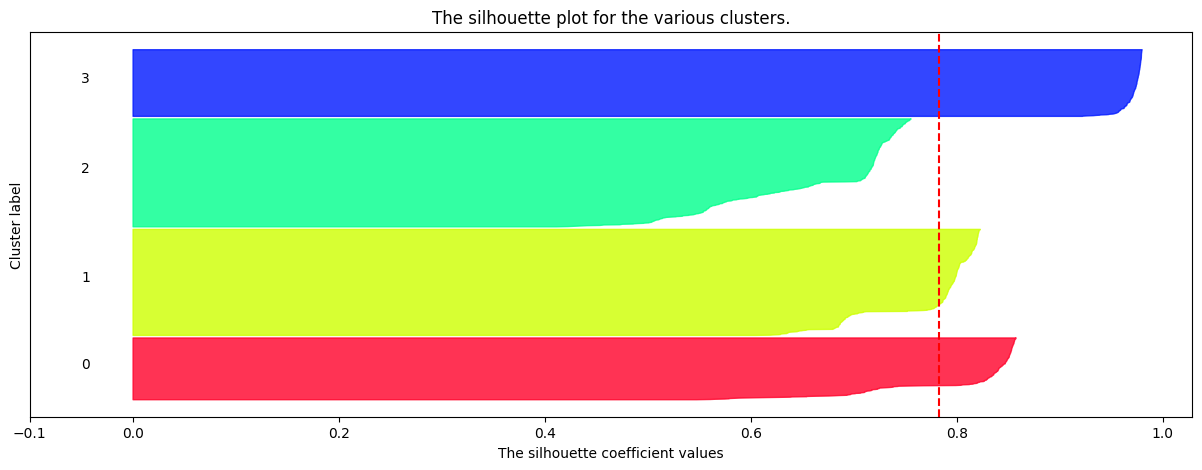

In [ ]:
X = Xworkdf_mm_pca

kmeans = KMeans(n_clusters = k_mm, random_state=rs ,n_init = 'auto')
kmeans.fit(X)

y_pred = kmeans.predict(X)
silhouette_avg = silhouette_score(X , y_pred)

# Return an array with all the silhouette score for each data !
sample_silhouette_values = silhouette_samples(X, y_pred)
sample_silhouette_values

y_lower = 10


fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(15, 5)


for i in range(k_mm):
  # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
  # this contain just the silhouette score for all the data belonging to the ith cluster
  ith_cluster_silhouette_values = sample_silhouette_values[y_pred == i]
  ith_cluster_silhouette_values.sort()

  size_cluster_i = ith_cluster_silhouette_values.shape[0]
  y_upper = y_lower + size_cluster_i   # defining the size for the color-filling

  color = cm.gist_rainbow(float(i) / k_mm)
  ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.8)

  # Label the silhouette plots with their cluster numbers at the middle
  ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

  # Compute the new y_lower for next plot
  y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([ -0.1 ,0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

The **rapid slope** indicated by the different silhouette scores, indicates a greater partitioning of the data maintained through *mm standardization*. This is because we have data that have either one feature (determined by original groups of similar features) or another strongly different .

Quite simply, many data within the same clusters have the same silhouette score : in the internal analysis derived from the *std standardized data* (with low mean silhoutte score), we notice instead that the **slope is very slight**, this tells us that the data within the same cluster less similar to each other than in the *mm standardization*.

### 7.2 Plot and analyze the distribution of the labels inside each cluster **(external evaluation)**

#### 7.2.1 *Xworkdf_std_pca*

Discount Analysis
*****

In [ ]:
X = Xworkdf_std_pca

kmeans = KMeans(n_clusters = k_std, random_state= rs , n_init = 'auto')
kmeans.fit(X)

y_pred = kmeans.predict(X)

<ipython-input-63-bf916c8c0e0c>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('gist_rainbow', k_std)


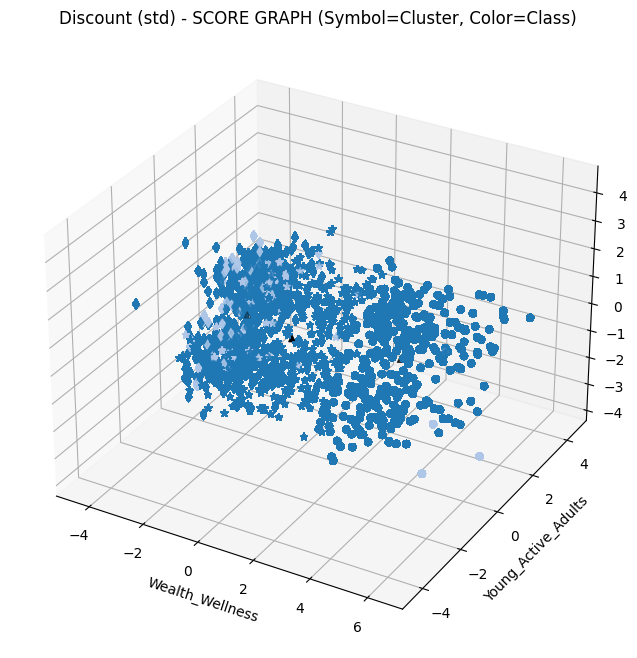

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

markers_dict = {0: '*', 1: 'o', 2: 'd'}
cmap = plt.cm.get_cmap('gist_rainbow', k_std)

plt.close('all')
ax_final = plt.figure(figsize=(8, 8)).add_subplot(111, projection='3d')

for ll in kmeans.labels_:
    ax_final.scatter(
        X[kmeans.labels_ == ll, 0],
        X[kmeans.labels_ == ll, 1],
        X[kmeans.labels_ == ll, 2],
        c=[colors[ii] for ii in discount_label[kmeans.labels_ == ll]],
        marker=markers_dict[ll],
        s=23
    )
ax_final.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='black', marker='^')

plt.title('Discount (std) - SCORE GRAPH (Symbol=Cluster, Color=Class)')
ax_final.set_xlabel(names_std[0])
ax_final.set_ylabel(names_std[1])
ax_final.set_zlabel(names_std[2])
plt.grid()
plt.show()



The cluster having the most positive labels (= 1) is that of Cluster 3 which we had named : **Centroid 3 = Low-income Customer** .
This result may look like something good to us, let us now see if the same thing will happen for the Campaign label. <br> <br>
Discount Analysis
*****

<ipython-input-64-9ef59aca1264>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('gist_rainbow', k_std)


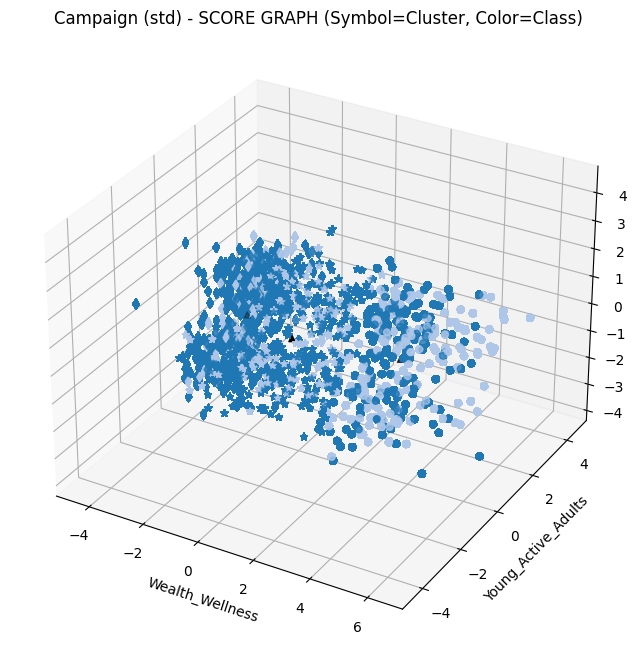

In [ ]:
markers_dict = {0: '*', 1: 'o', 2: 'd'}
cmap = plt.cm.get_cmap('gist_rainbow', k_std)

plt.close('all')
ax_final = plt.figure(figsize=(8, 8)).add_subplot(111, projection='3d')

for ll in kmeans.labels_:
    ax_final.scatter(
        X[kmeans.labels_ == ll, 0],
        X[kmeans.labels_ == ll, 1],
        X[kmeans.labels_ == ll, 2],
        c=[colors[ii] for ii in accepted_campaign[kmeans.labels_ == ll]],
        marker=markers_dict[ll],
        s=23
    )
ax_final.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='black', marker='^')

plt.title('Campaign (std) - SCORE GRAPH (Symbol=Cluster, Color=Class)')
ax_final.set_xlabel(names_std[0])
ax_final.set_ylabel(names_std[1])
ax_final.set_zlabel(names_std[2])
plt.grid()
plt.show()

In this case, however, the result is much more confusing. Nevertheless, it is noticeable how there is a greater tendency of affluent people to use multiple campaigns. This result was already predictable from previous exercises.  

#### 7.2.1 *Xworkdf_mm_pca*

In [ ]:
X = Xworkdf_mm_pca

kmeans = KMeans(n_clusters = k_mm, random_state= rs , n_init = 'auto')
kmeans.fit(X)

y_pred = kmeans.predict(X)

<ipython-input-66-514538ca7990>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('gist_rainbow', k_mm)


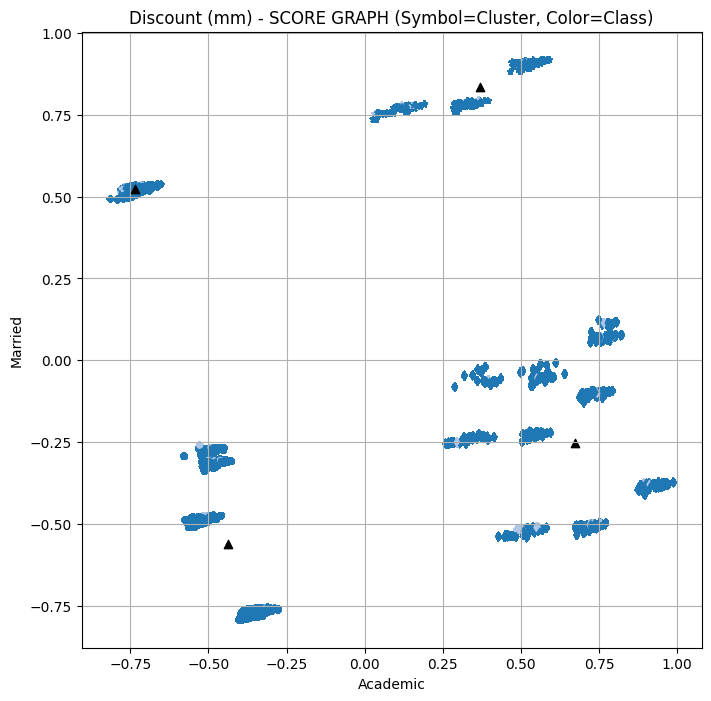

In [ ]:
markers_dict = {0: '*', 1: 'o', 2: 'd', 3:'P'}
cmap = plt.cm.get_cmap('gist_rainbow', k_mm)

plt.close('all')
ax_final = plt.figure(figsize=(8, 8)).add_subplot(111)

for ll in kmeans.labels_:
    ax_final.scatter(
        X[kmeans.labels_ == ll, 0],
        X[kmeans.labels_ == ll, 1],
        c=[colors[ii] for ii in discount_label[kmeans.labels_ == ll]],
        marker=markers_dict[ll],
        s=17
    )
ax_final.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='^')

plt.title('Discount (mm) - SCORE GRAPH (Symbol=Cluster, Color=Class)')
ax_final.set_xlabel(names_mm[0])
ax_final.set_ylabel(names_mm[1])
plt.grid()
plt.show()

<ipython-input-67-ce5dc31f3bda>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('gist_rainbow', k_std)


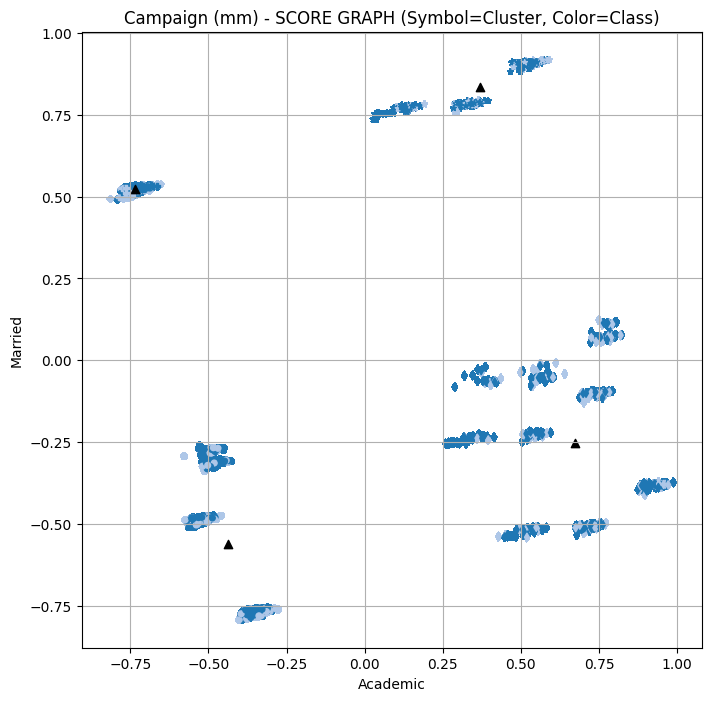

In [ ]:
markers_dict = {0: '*', 1: 'o', 2: 'd', 3:'P'}
cmap = plt.cm.get_cmap('gist_rainbow', k_std)

plt.close('all')
ax_final = plt.figure(figsize=(8, 8)).add_subplot(111)

for ll in kmeans.labels_:
    ax_final.scatter(
        X[kmeans.labels_ == ll, 0],
        X[kmeans.labels_ == ll, 1],
        c=[colors[ii] for ii in accepted_campaign[kmeans.labels_ == ll]],
        marker=markers_dict[ll],
        s=17
    )
ax_final.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='^')

plt.title('Campaign (mm) - SCORE GRAPH (Symbol=Cluster, Color=Class)')
ax_final.set_xlabel(names_mm[0])
ax_final.set_ylabel(names_mm[1])
plt.grid()
plt.show()

The result this round is almost disappointing. We find no correlations with the clusters derived from the kmeans algorithm.

## 8. Final Considerations
---




The analysis performed is not entirely satisfactory : we thought, as in the labs written by Prof. Della Santa , we would be able to apply PCA and through the k-means algorithm to identify classes that are consistent with the labels provided by the dataset. I am not saying that this did not happen but simply the information obtained is almost obvious and trivial for all this work. The main information we were able to obtain is that : <br>
- The most affluent customers are the ones who use less promotions and are more solicited to campaigns. The opposite is true for less affluent ones.
- Although mm standardization worked better in terms of data partitioning ( crucial then for clusterization ), unfortunately the information we could derive between marital status and instruction level was really few, and to avoid hazarding too much we decided not to try to give meaning. <br>
<br>


The disappointment comes mostly from the fact that all the assumptions made about PCs could very well have been made just by looking at the dataset, or by implementing simpler machine learning algorithms.  <br>
If, on the other hand, we want to see this work as a technical/practical confirmation of already known notions, then we can be satisfied.  <br> <br>

This was as far as clustering a dataset reduced in dimensionality by PCA was concerned. As for the standardization part, on the other hand, we obtained interesting analyses in the previous chapters, especially regarding the variance difference in the PCs of the MinMaxScaler() and the StandardScaler().

## Future Improvements :


What we could work on in the future to try to improve the work is certainly:
- Try to do the analysis by comparing with different labels or try to code differently from how it was done.
- Take advantage of the use of other encoding methods for categorical features. We believe that the choice of this technique was decisive for the entire work.